In [124]:
from astropy.table import Table
from astropy.io import fits
from astropy import wcs
import os
import re
import collections
from shutil import copy
from spec_id import Gen_spec, Scale_model
from astropy.cosmology import Planck13, z_at_value
from astropy import wcs
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage import interpolation
import matplotlib.pyplot as plt 
from grizli.multifit import GroupFLT, MultiBeam, get_redshift_fit_defaults
import grizli.utils
import grizli.model
from glob import glob
import grizli.model
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
from time import time
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

In [42]:
wave,flux = np.load(hpath + 'fsps_models_for_fit/fsps_spec/m0.015_a1.0_dt8.0_spec.npy')

In [223]:
flt_list = glob('/Volumes/Vince_research/clear_q_beams/*')
fids = [os.path.basename(U).replace('.g102.A.fits','').split('_')[-1] for U in flt_list]

In [225]:
shiftlog = pd.DataFrame({'ids':fids, 'shift':np.zeros(len(fids))})

In [328]:
fids[20]

'19148'

In [298]:
np.arange(1000,20000,100).size

190

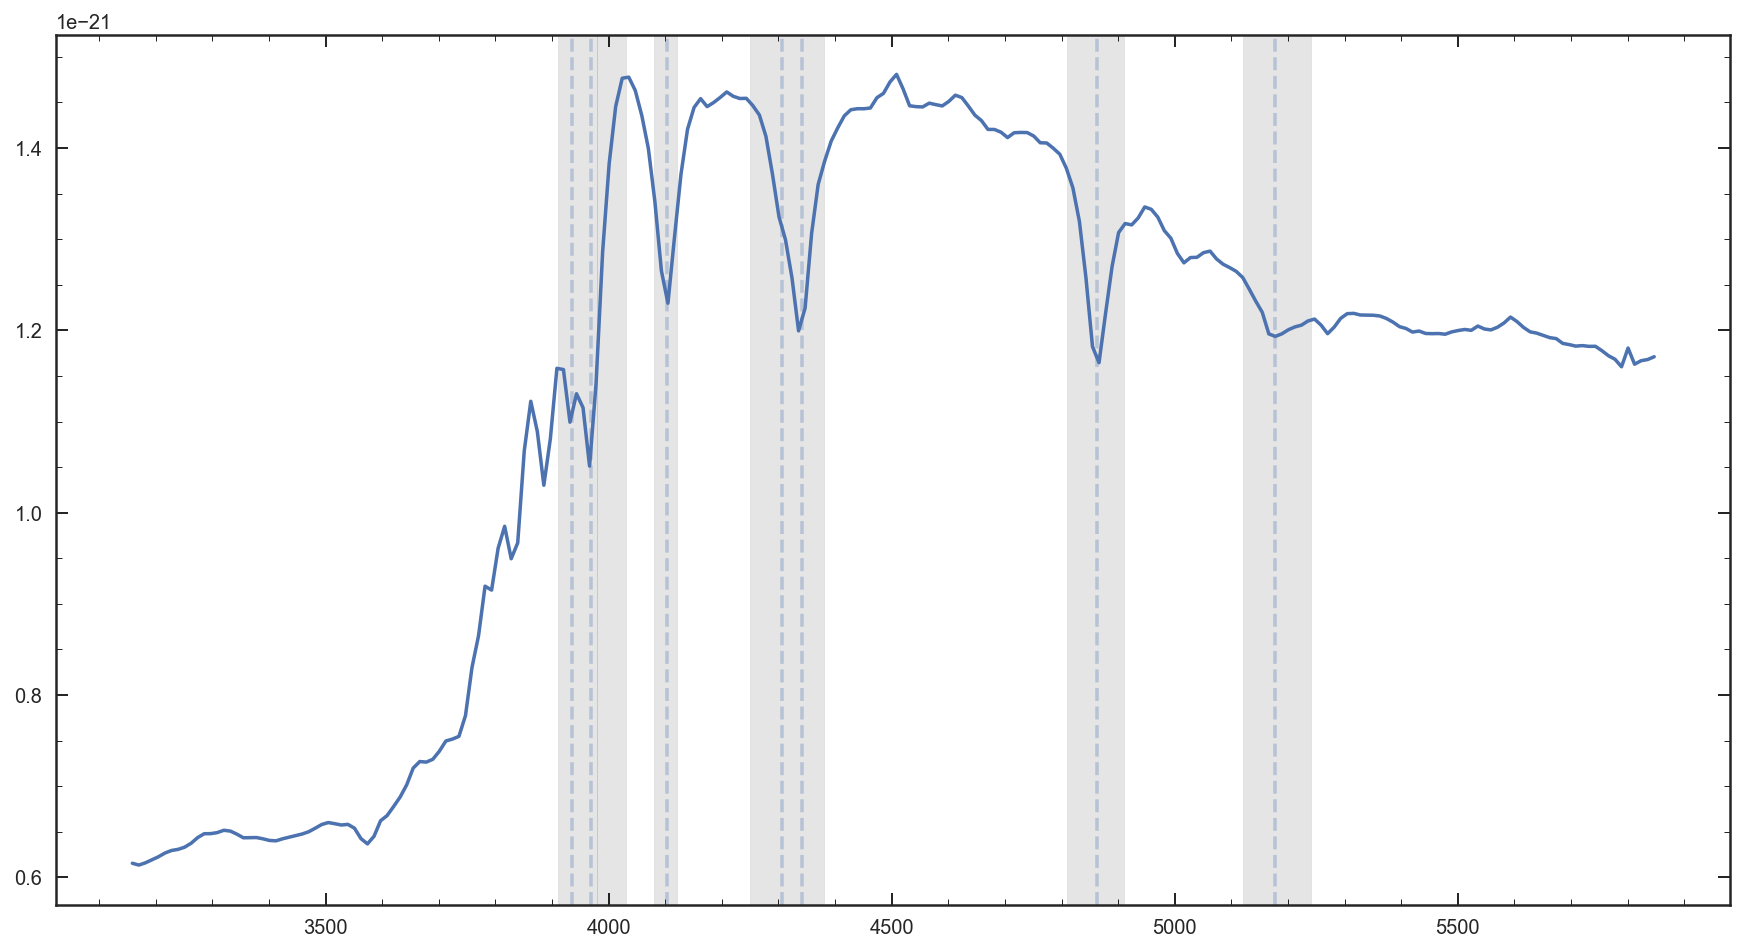

In [332]:
shift = 1
idx = 20

### BeamCutout object
co = grizli.model.BeamCutout(fits_file=flt_list[idx])

co.beam.compute_model(spectrum_1d=[wave*(2.2), flux])
if shift == 0:
    w, f, e = co.beam.optimal_extract(co.beam.model , bin=0)
else:
    w, f, e = co.beam.optimal_extract(np.append(np.zeros([shift,co.beam.model.shape[0]]),co.beam.model.T[:-1],axis=0).T , bin=0)

flat = co.flat_flam.reshape(co.beam.sh_beam)
# fwv,ffl,ferr = co.beam.optimal_extract(flat, bin=0, ivar=co.ivar)
# if shift == 0:
#     w, ffl, e = co.beam.optimal_extract(co.beam.model , bin=0)
# else:
w, ffl, e = co.beam.optimal_extract(np.append(np.zeros([shift,flat.shape[0]]),flat.T[:-1],axis=0).T , bin=0)

shiftlog['shift'][idx] = shift

# IDX= [U for U in range(len(w)) if 7700 < w[U] < 11700]
        
# w= w[IDX]

fl = f/ffl
# fl = fl[IDX]
plt.figure(figsize=[15,8])
plt.plot(w / (2.2),fl)

plt.axvline(3934.777,linestyle='--', alpha=.3)
plt.axvline(3969.588,linestyle='--', alpha=.3)
plt.axvline(4102.89,linestyle='--', alpha=.3)
plt.axvline(4305.61,linestyle='--', alpha=.3)
plt.axvline(4341.68,linestyle='--', alpha=.3)
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(5176.7,linestyle='--', alpha=.3)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5240, color='k', alpha=.1)

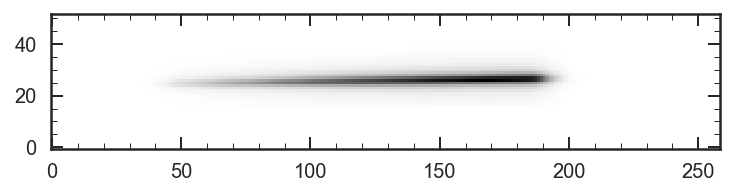

In [294]:
plt.imshow(co.beam.model, interpolation='Nearest', cmap='gray_r', origin='lower')

In [330]:
fl[IDX]/ffl[IDX]

array([1.02624975e-37, 8.17877111e-38, 6.64640145e-38, 5.54100083e-38,
       4.69826509e-38, 3.96118343e-38, 3.30546605e-38, 2.80691374e-38,
       2.47777875e-38, 2.25902905e-38, 2.05745518e-38, 1.90870417e-38,
       1.79070704e-38, 1.70318013e-38, 1.64590478e-38, 1.57827917e-38,
       1.50504893e-38, 1.44582170e-38, 1.40148136e-38, 1.36411029e-38,
       1.31172316e-38, 1.26109120e-38, 1.24151043e-38, 1.26720695e-38,
       1.26423076e-38, 1.29068676e-38, 1.23929260e-38, 1.25988864e-38,
       1.25280448e-38, 1.17202874e-38, 1.15847679e-38, 1.24305973e-38,
       1.27220941e-38, 1.20538516e-38, 1.11590946e-38, 1.14955246e-38,
       1.21101193e-38, 1.19030891e-38, 1.11138746e-38, 1.11924131e-38,
       1.07650746e-38, 9.86651333e-39, 1.04324698e-38, 1.14620851e-38,
       1.20552621e-38, 1.23397176e-38, 1.23390970e-38, 1.20974799e-38,
       1.17514668e-38, 1.13266236e-38, 1.08454024e-38, 1.02033803e-38,
       9.46128538e-39, 9.06177915e-39, 9.46758158e-39, 9.83042498e-39,
      

In [307]:
flat.shape

(52, 259)

In [180]:
new_direct = co.beam.direct*(co.beam.seg == gal_id) 

In [205]:
co.beam.model.shape

(52, 259)

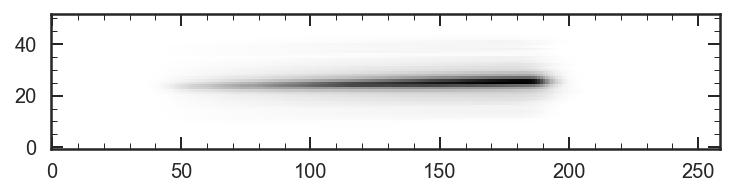

In [206]:
plt.imshow(np.append(np.zeros([5,52]),co.beam.model.T[:-5],axis=0).T , interpolation='Nearest', cmap='gray_r', origin='lower')

In [141]:
co.write_fits(root='/Volumes/Vince_research/grism_beams/{0}'.format(pre), clobber=True)
fits.setval('/Volumes/Vince_research/grism_beams/{0}_{1}.G102.A.fits'.format(pre,gal_id), 'EXPTIME', ext=0,
            value=fits.open('/Volumes/Vince_research/grism_beams/{0}_{1}.G102.A.fits'.format(pre,gal_id))[1].header['EXPTIME'])

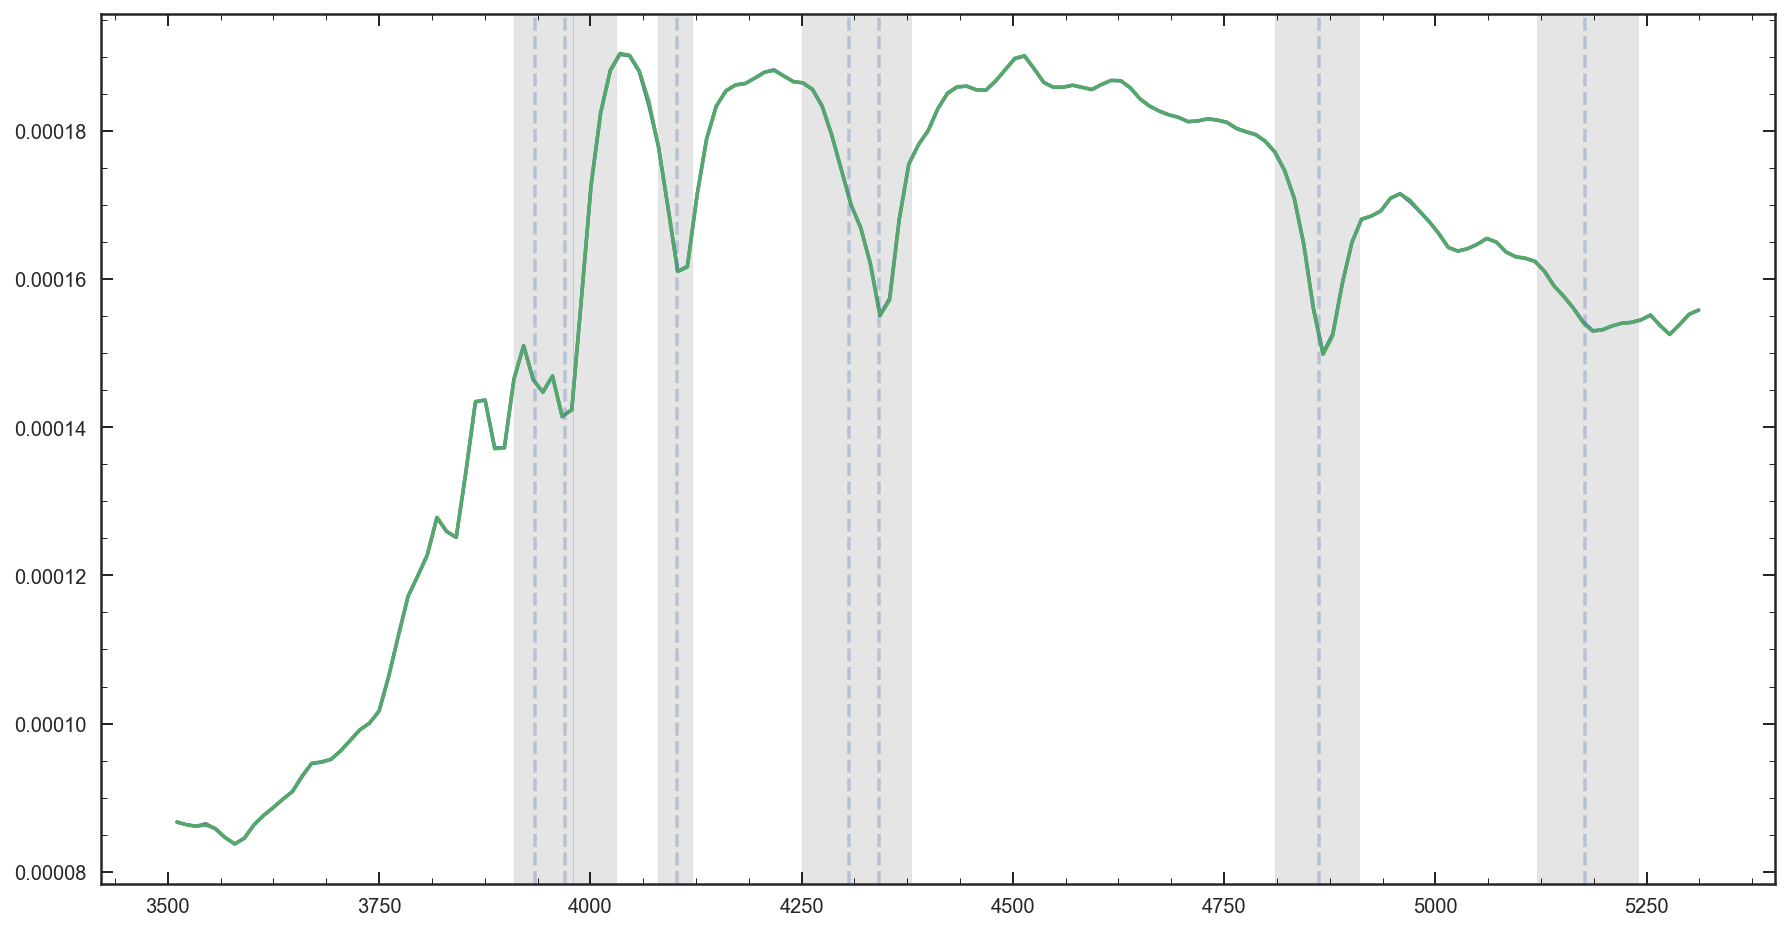

In [132]:
plt.figure(figsize=[15,8])
plt.plot(w / (2.2),fl)
plt.plot(w / (2.2),fl2)

plt.axvline(3934.777,linestyle='--', alpha=.3)
plt.axvline(3969.588,linestyle='--', alpha=.3)
plt.axvline(4102.89,linestyle='--', alpha=.3)
plt.axvline(4305.61,linestyle='--', alpha=.3)
plt.axvline(4341.68,linestyle='--', alpha=.3)
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(5176.7,linestyle='--', alpha=.3)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5240, color='k', alpha=.1)

In [57]:
mb = MultiBeam(beams, fcontam=1, group_name='s{0}'.format(19442))
mb.write_beam_fits(verbose=False)
fls = glob('*{0}*'.format(19442))

for ii in fls:
    fits.setval(ii, 'EXPTIME', ext=0,value=fits.open(ii)[1].header['EXPTIME'])

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1221: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1349: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2969: FutureWarning: `rcond` parameter will change to the default of

# Create new Gen_sim

In [335]:
class Gen_spec2(object):
    def __init__(self, galaxy_id, redshift,minwv = 7900, maxwv = 11300, shift = 1):
        self.galaxy_id = galaxy_id
        self.gid = int(self.galaxy_id[1:])
        self.redshift = redshift
        self.shift

        """ 
        self.flt_input - grism flt (not image flt) which contains the object you're interested in modeling, this
                         will tell Grizli the PA
        **
        self.galaxy_id - used to id galaxy and import spectra
        **
        self.beam - information used to make models
        **
        self.wv - output wavelength array of simulated spectra
        **
        self.fl - output flux array of simulated spectra
        """

        if self.galaxy_id == 's35774':
            maxwv = 11100

        gal_wv, gal_fl, gal_er = np.load(glob('/Volumes/Vince_research/Extractions/Updated_Q_gals/stack_specs/*{0}*'.format(self.gid))[0])
        self.flt_input = glob('/Volumes/Vince_research/clear_q_beams/*{0}*'.format(self.gid))[0]

        IDX = [U for U in range(len(gal_wv)) if minwv <= gal_wv[U] <= maxwv]

        self.gal_wv_rf = gal_wv[IDX] / (1 + self.redshift)
        self.gal_wv = gal_wv[IDX]
        self.gal_fl = gal_fl[IDX]
        self.gal_er = gal_er[IDX]

        self.gal_wv_rf = self.gal_wv_rf[self.gal_fl > 0 ]
        self.gal_wv = self.gal_wv[self.gal_fl > 0 ]
        self.gal_er = self.gal_er[self.gal_fl > 0 ]
        self.gal_fl = self.gal_fl[self.gal_fl > 0 ]


        ## Spectrum cutouts
        self.beam = grizli.model.BeamCutout(fits_file=self.flt_input)

        ## Get sensitivity function

        flat = self.beam.flat_flam.reshape(self.beam.beam.sh_beam)
        fwv, ffl, e = self.beam.beam.optimal_extract(np.append(np.zeros([self.shift,flat.shape[0]]),flat.T[:-1],axis=0).T , bin=0)
        
        self.filt = interp1d(fwv, ffl)(self.gal_wv)
        
    def Sim_spec(self, metal, age, tau, model_redshift = 0):
        if model_redshift ==0:
            model_redshift = self.redshift
        
        model = '../../../fsps_models_for_fit/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(metal, age, tau)

        wave, fl = np.load(model)

        ## Compute the models
        self.beam.compute_model(spectrum_1d=[wave*(1+model_redshift),fl])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(np.append(np.zeros([self.shift,self.beam.model.shape[0]]),self.beam.model.T[:-1],axis=0).T , bin=0)

        ifl = interp1d(w, f)(self.gal_wv)
        adj_ifl = ifl /self.filt
        C = Scale_model(self.gal_fl, self.gal_er, adj_ifl)

        self.fl = C * adj_ifl
        
    def Sim_spec_mult(self, wave, fl, model_redshift = 0):
        if model_redshift ==0:
            model_redshift = self.redshift

        ## Compute the models
        self.beam.compute_model(spectrum_1d=[wave*(1+model_redshift), fl])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(np.append(np.zeros([self.shift,self.beam.model.shape[0]]),self.beam.model.T[:-1],axis=0).T , bin=0)

        self.fl = f
        self.mwv = w

In [336]:
sp = Gen_spec2('n21156',1.251)

In [349]:
sp.Sim_spec(0.03,1.0,8.0)

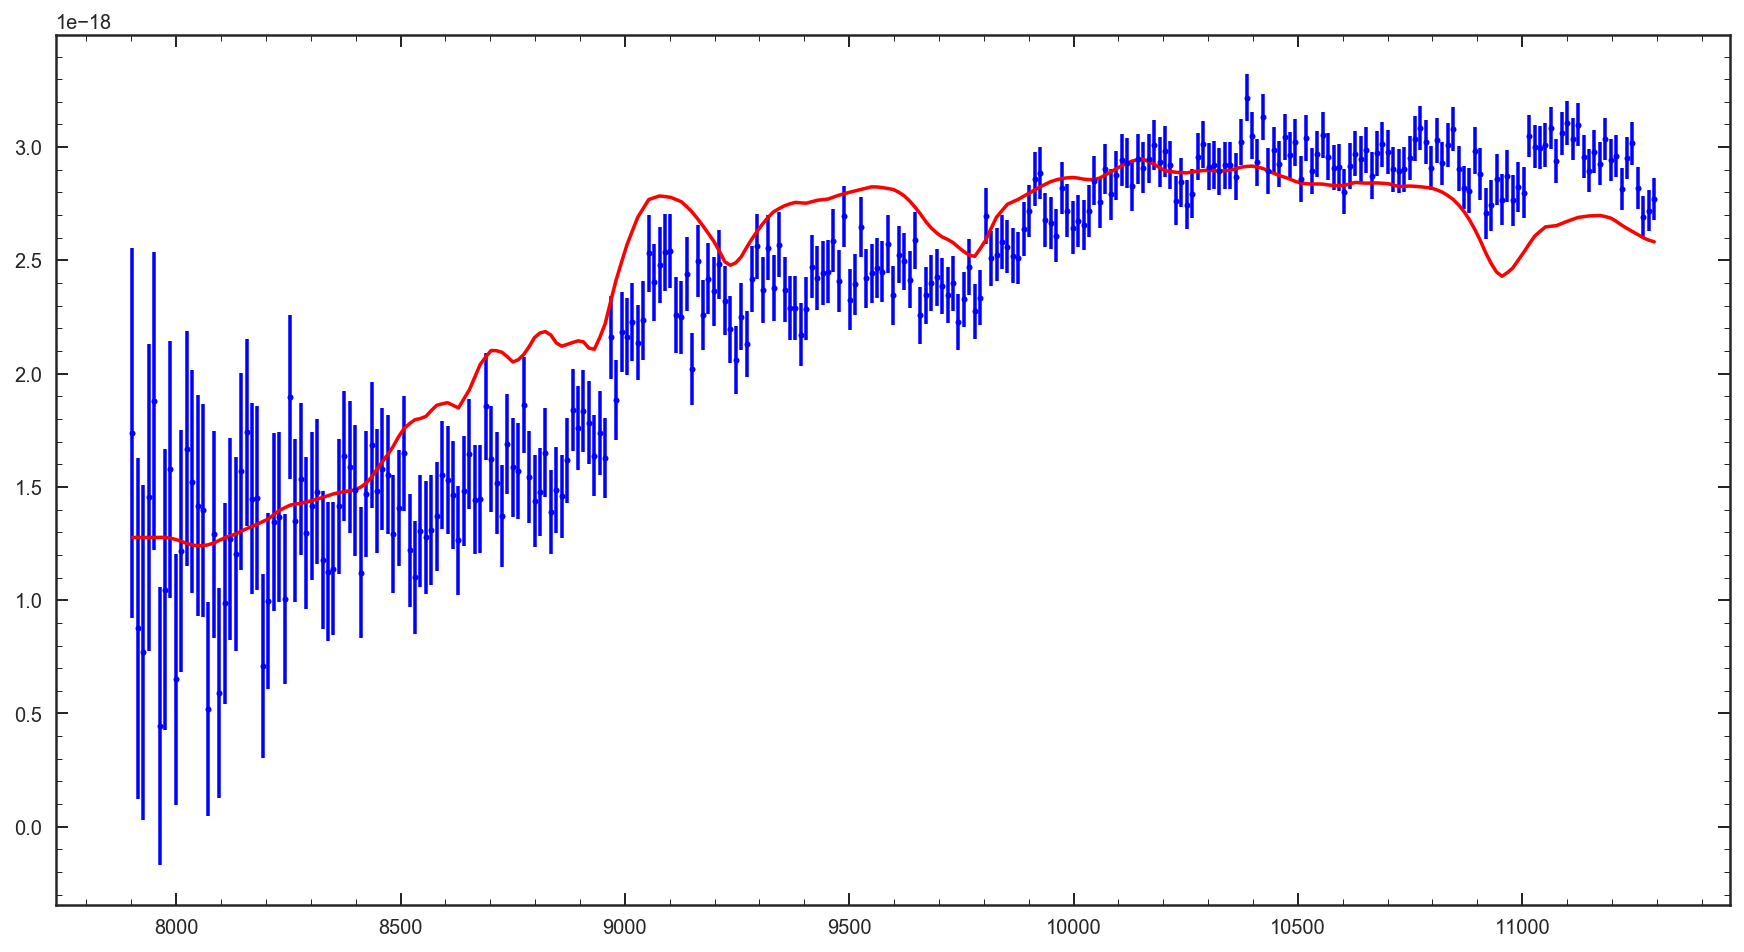

In [350]:
plt.figure(figsize=[15,8])
plt.errorbar(sp.gal_wv,sp.gal_fl,sp.gal_er,linestyle='None', marker='o', markersize=3, color='b')
plt.plot(sp.gal_wv,sp.fl,'r')

In [42]:
blist = glob('/Volumes/Vince_research/grism_beams/*21156*')

In [43]:
blist

['/Volumes/Vince_research/grism_beams/icxt51jvq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt51jwq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt51jzq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt51k1q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt52i0q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt52i1q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt52i4q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt52i6q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt53i9q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt53iaq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt53idq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt53ifq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt55krq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt55ksq_flt_21156.g102.A

In [13]:
wave,flux = np.load('/Users/Vince.ec/fsps_models_for_fit/fsps_spec/m0.019_a2.0_dt8.0_spec.npy')

In [5]:
nbeamid = list(set(n_beams_id))

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt

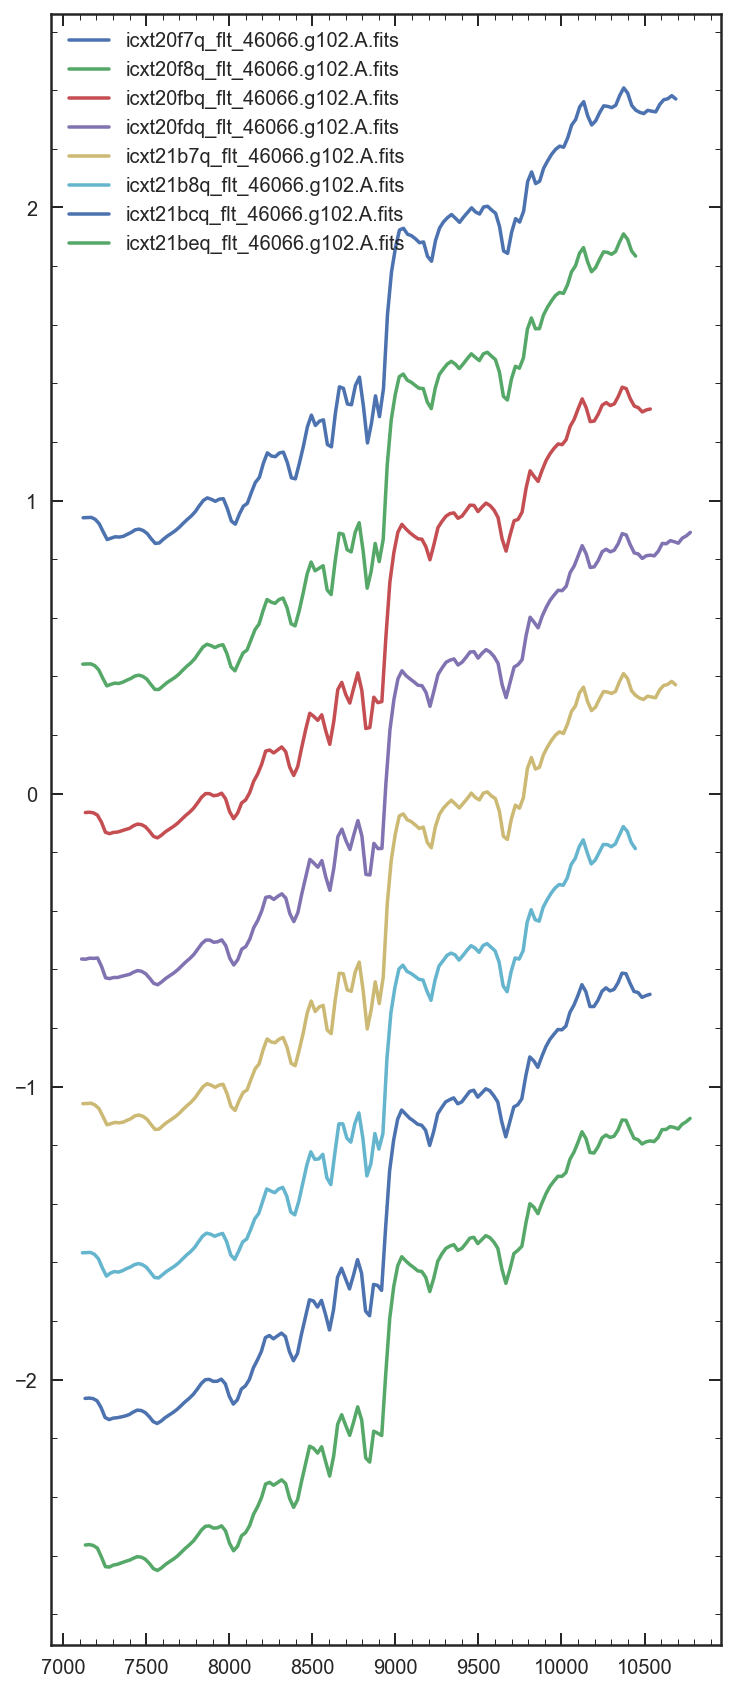

In [20]:
## idx = nbeamid[55]
blist = glob('/Volumes/Vince_research/grism_beams/*{0}*'.format(46066))

plt.figure(figsize=[6,15])

for i in range(len(blist)):
    beam = grizli.model.BeamCutout(fits_file=blist[i])
    beam.compute_model(spectrum_1d=[wave*(2.251), flux])
    flat = beam.flat_flam.reshape(beam.beam.sh_beam)
    fwave,fflux,ferr = beam.beam.optimal_extract(flat, bin=0, ivar=beam.ivar)
    w, f, e = beam.beam.optimal_extract(beam.model, bin=0)
    fwv, ffl = [beam.beam.lam, beam.beam.sensitivity / np.max(beam.beam.sensitivity)]

    f /=fflux
    f = f/f[100]
    plt.plot(w,f-(i*0.5),label = os.path.basename(blist[i]))
plt.legend()
# plt.title('{0}'.format(idx))
# plt.ylim(-10,10)
# plt.xlim(7700,11700)

In [17]:
blist[-3]

'/Volumes/Vince_research/grism_beams/icxt14rqq_flt_45972.g102.A.fits'

In [19]:
idx= 0
copy(blist[idx],'/Volumes/Vince_research/clear_q_beams/' + os.path.basename(blist[idx]))

'/Volumes/Vince_research/clear_q_beams/icxt01cgq_flt_45972.g102.A.fits'

In [209]:
blist

['/Volumes/Vince_research/grism_beams/icxt24a5q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt24a7q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt24z2q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt24z4q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt25buq_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt25bwq_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt25c3q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt25c5q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt26h8q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt26h9q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt26hcq_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt26heq_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt27hhq_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt27hiq_flt_27231.g102.A

In [6]:
blist = glob('/Volumes/Vince_research/Extractions/Updated_Q_gals/stack_specs/*')

In [7]:
os.path.basename(blist[0]).replace('.npy','')
os.chdir('/Users/Vince.ec/Github/Quiescent_analysis/scripts/')

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

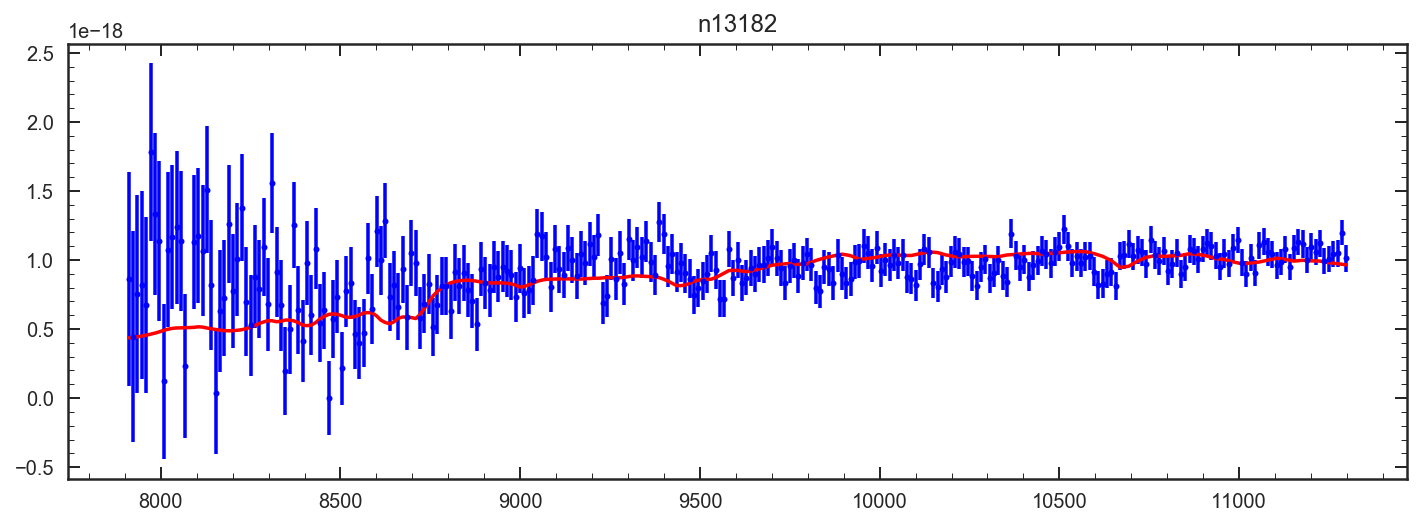

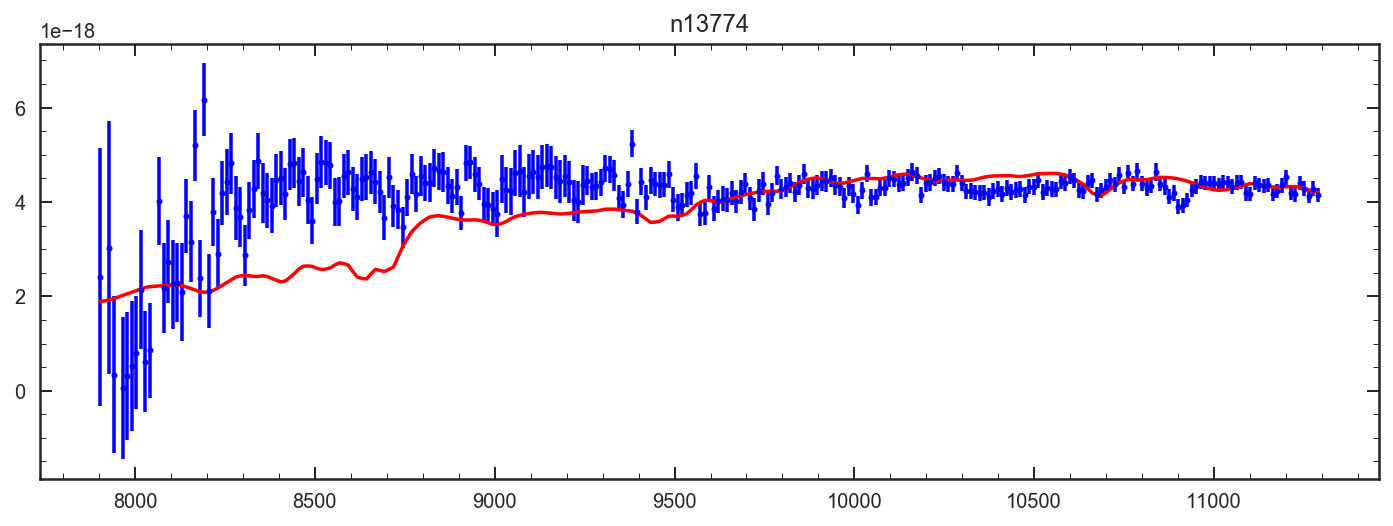

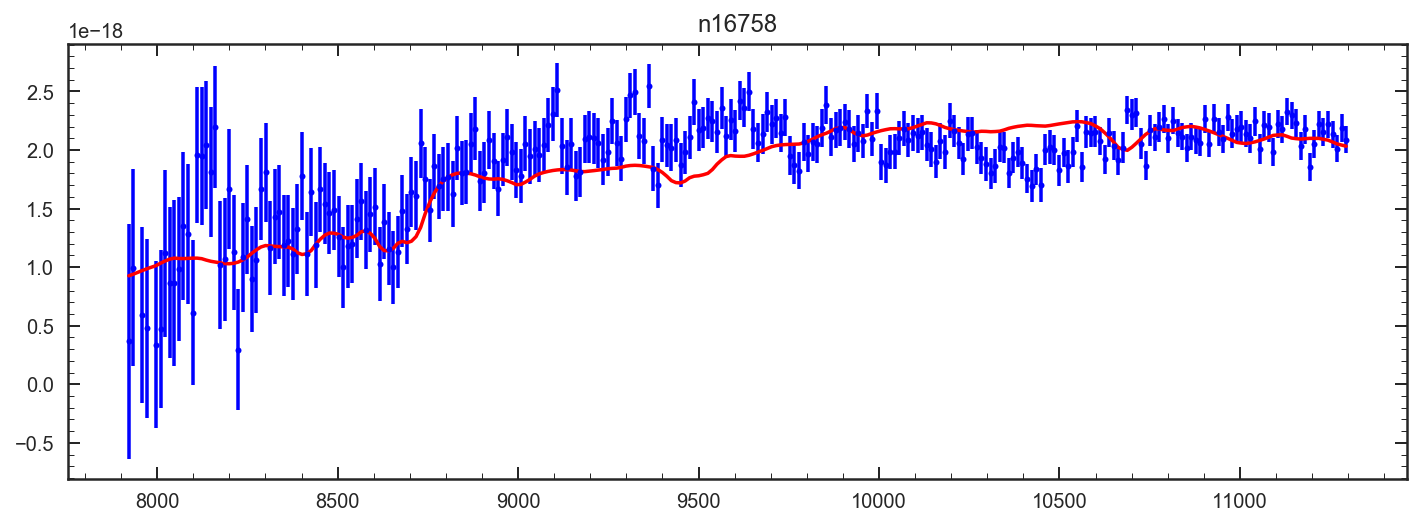

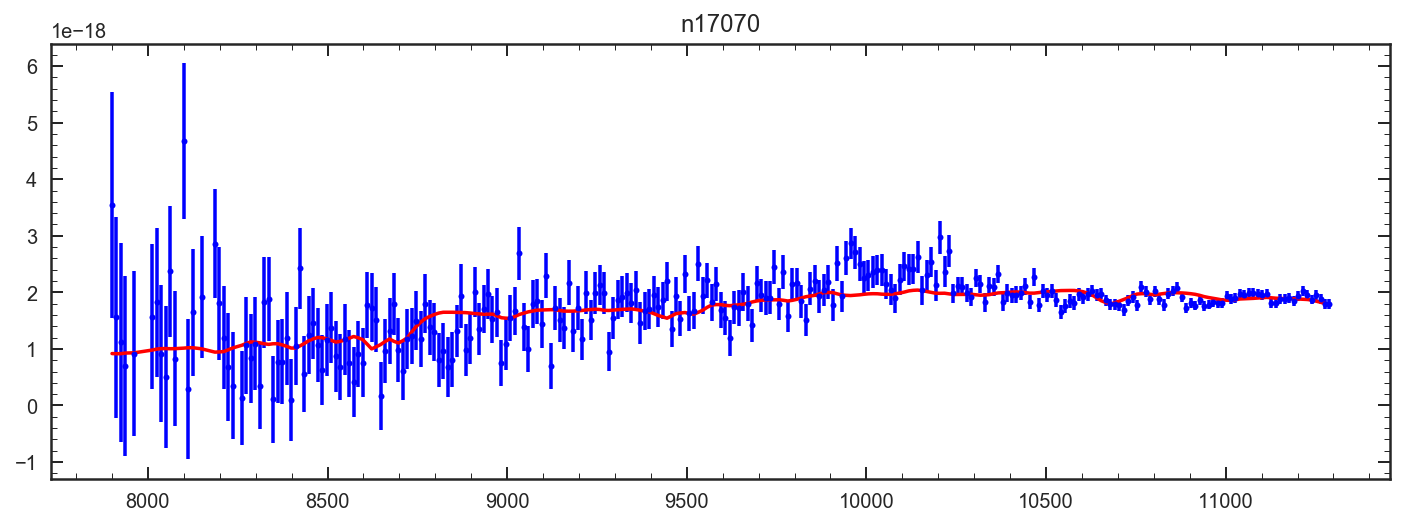

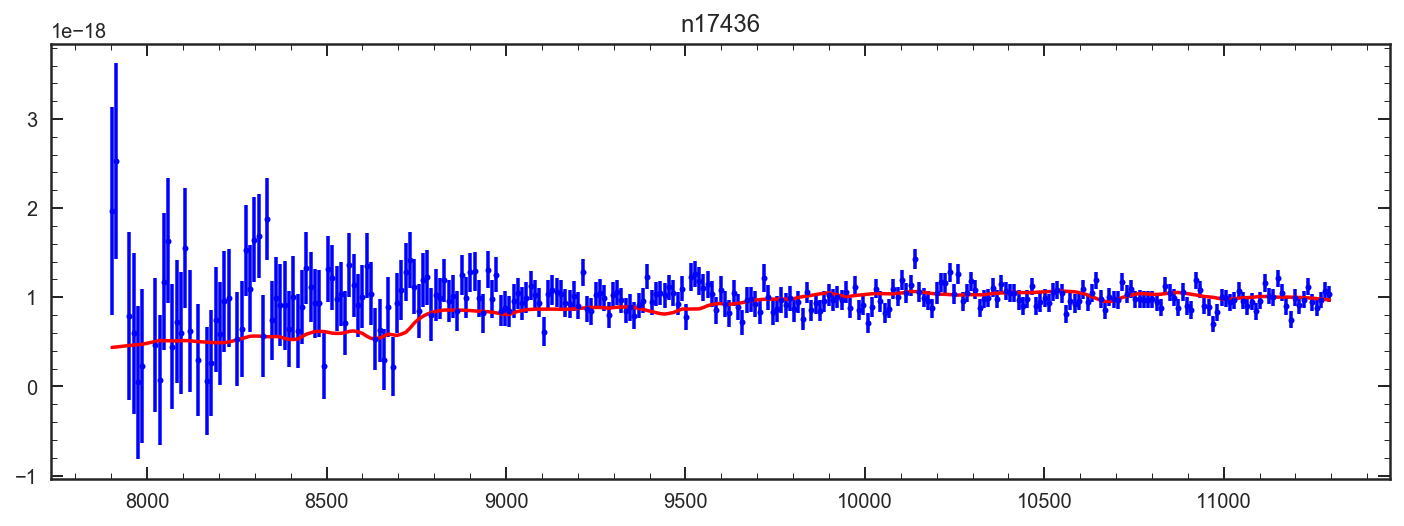

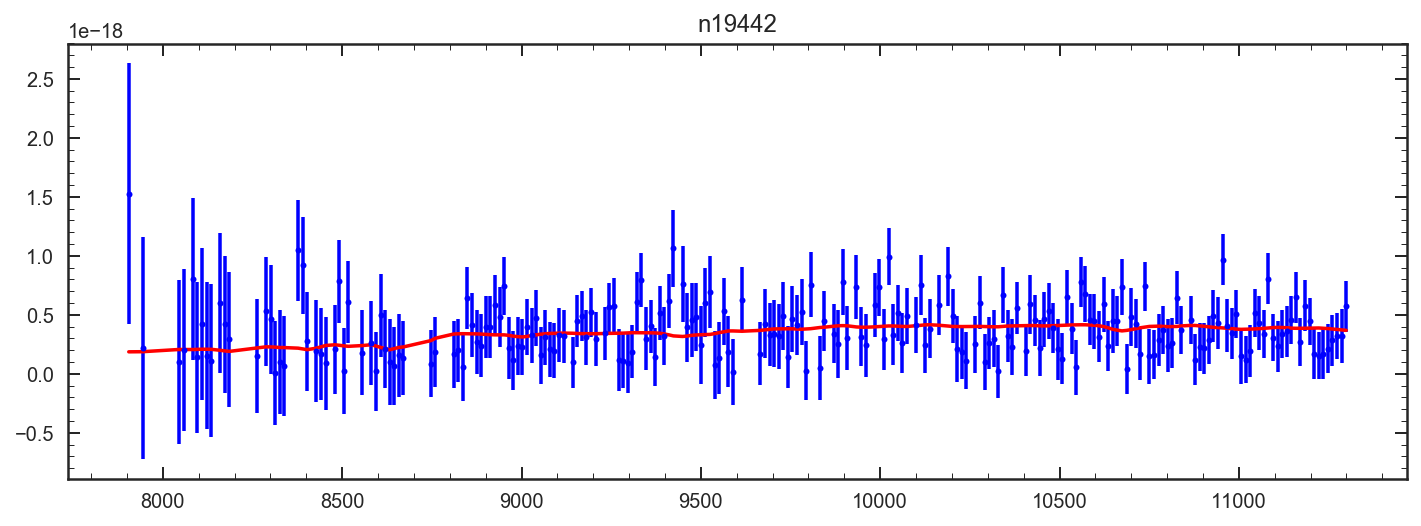

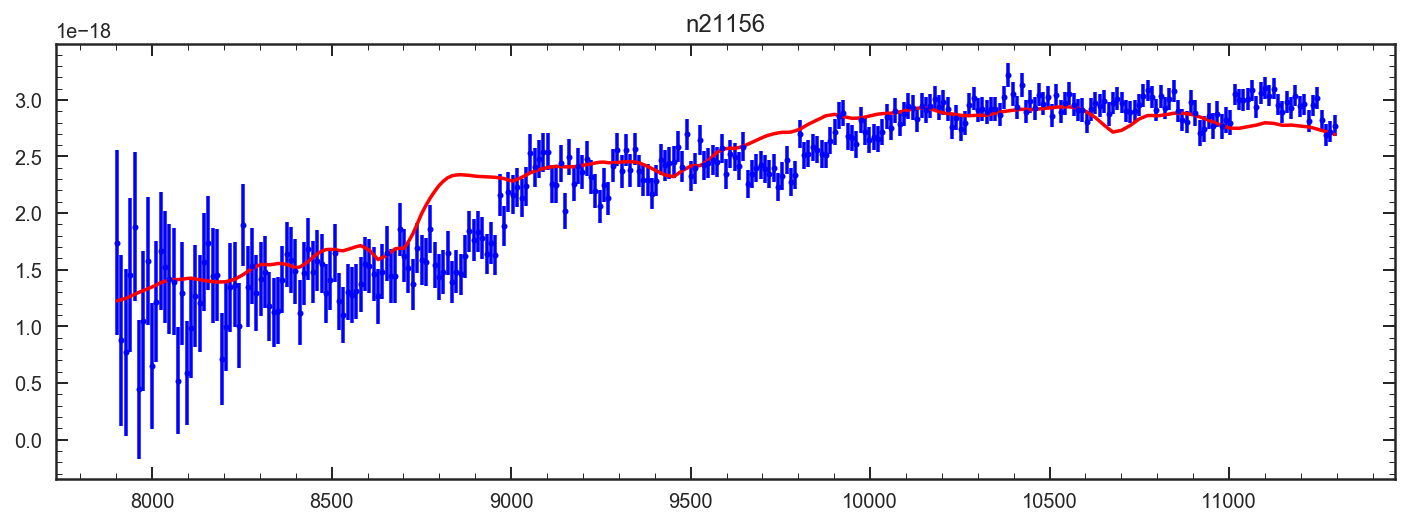

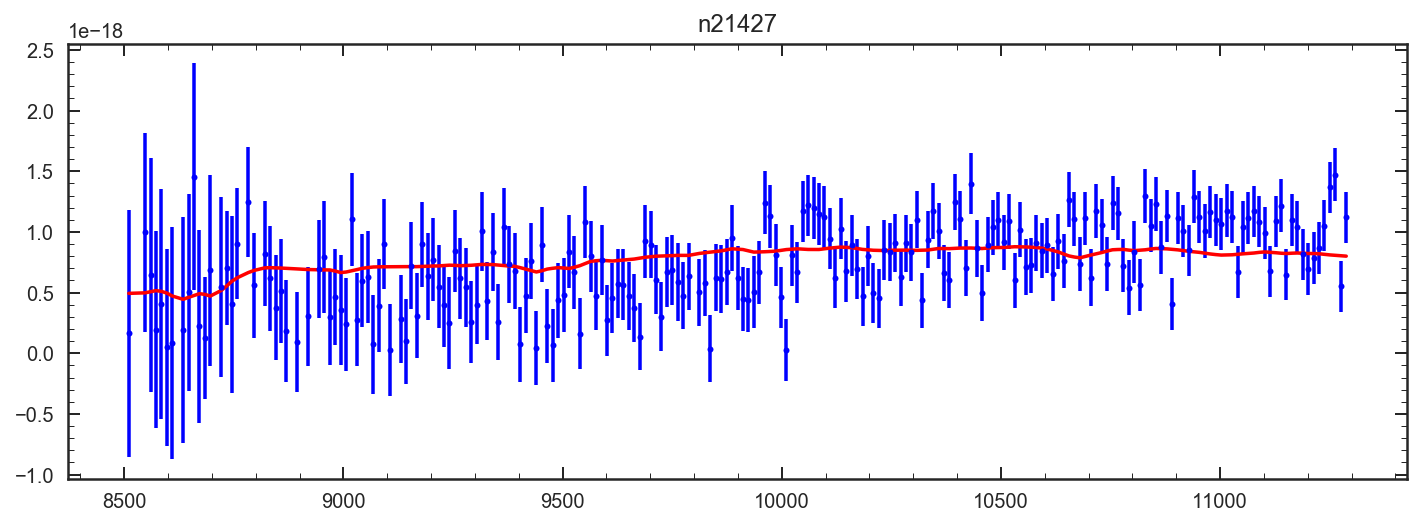

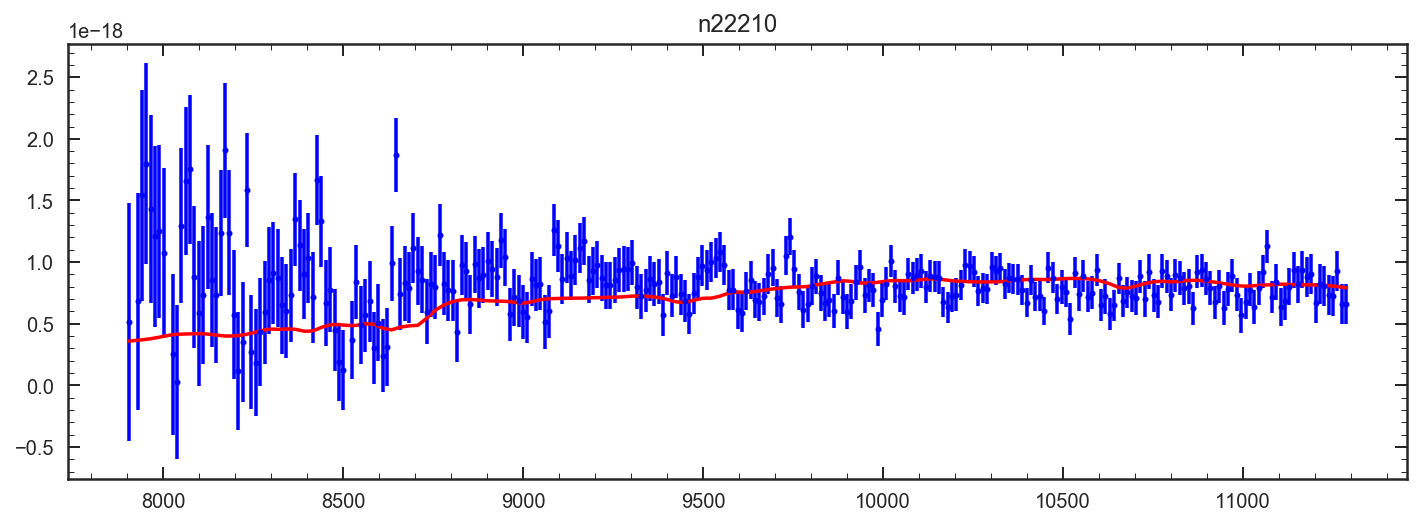

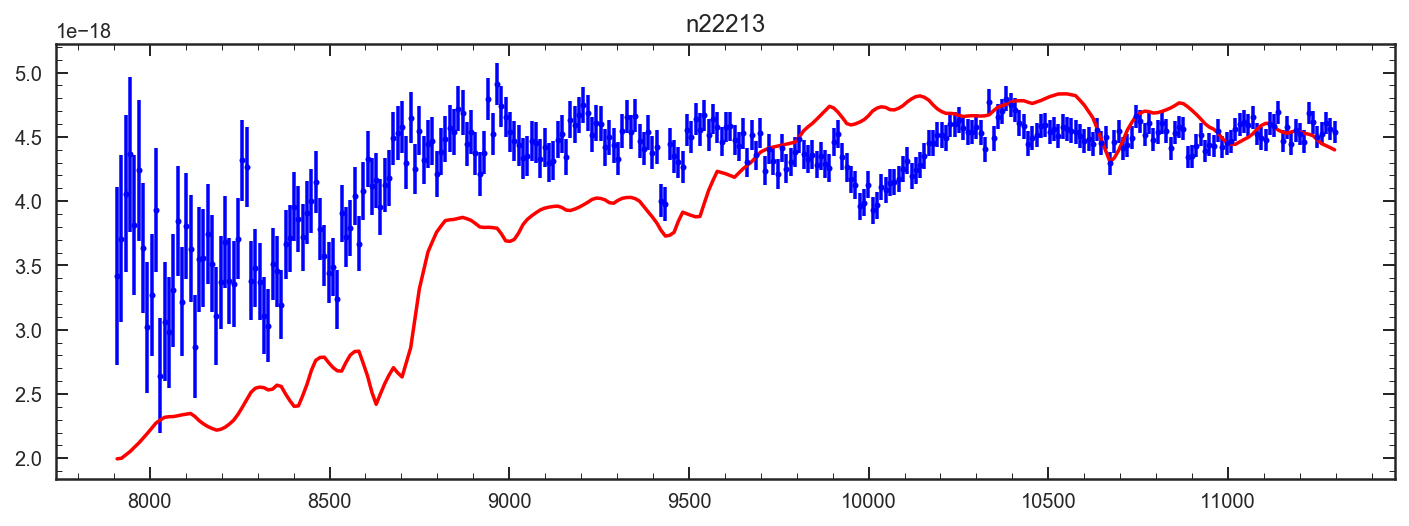

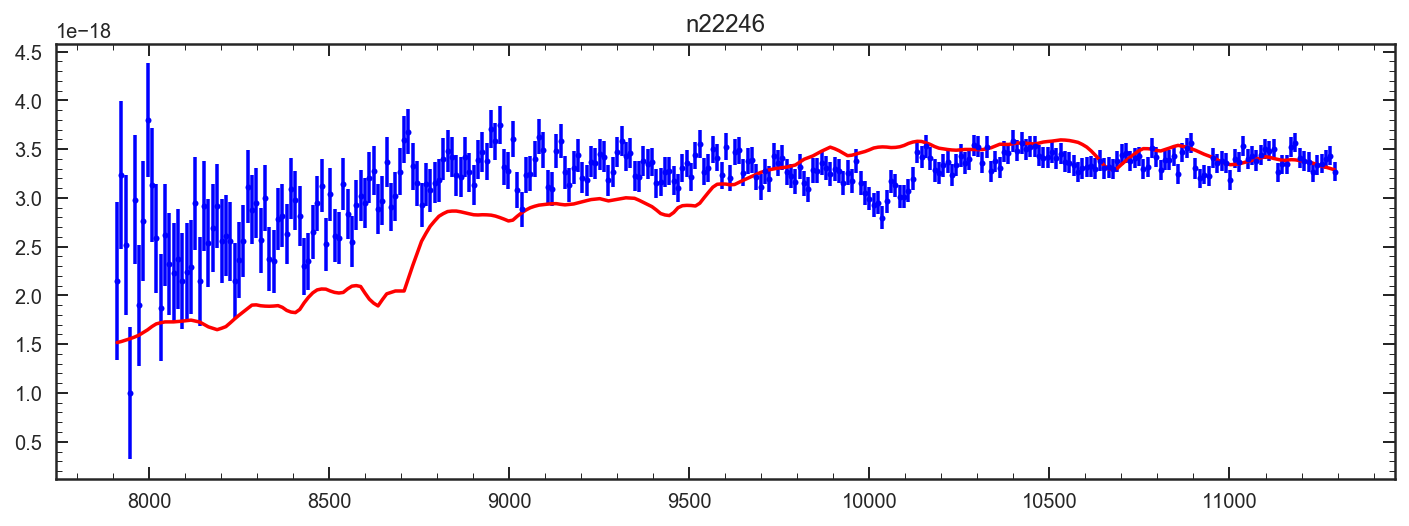

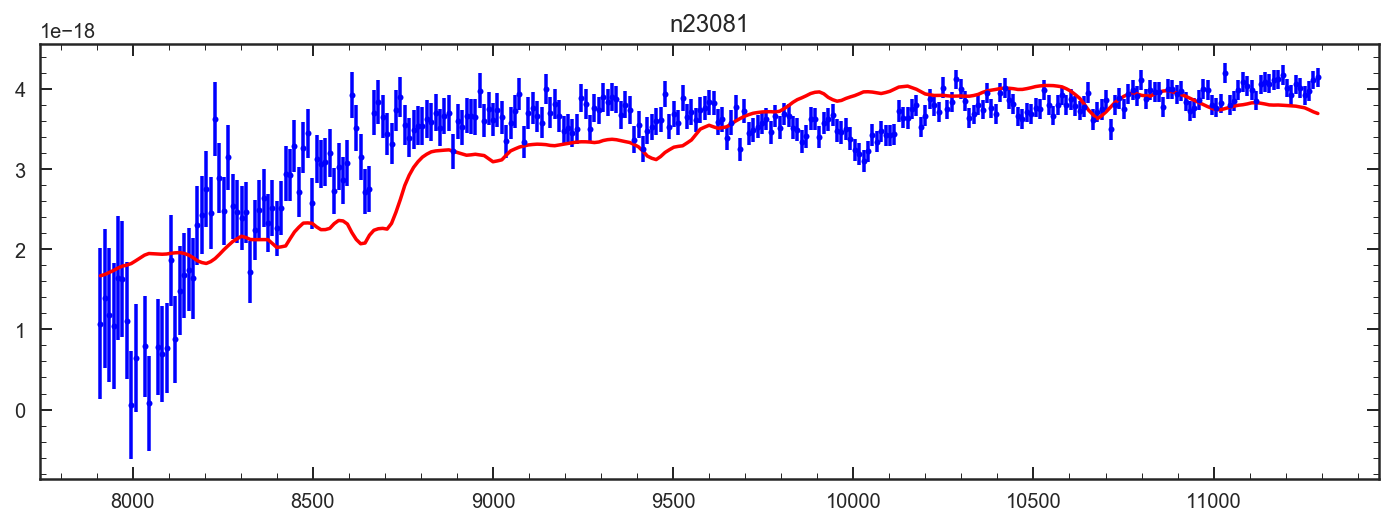

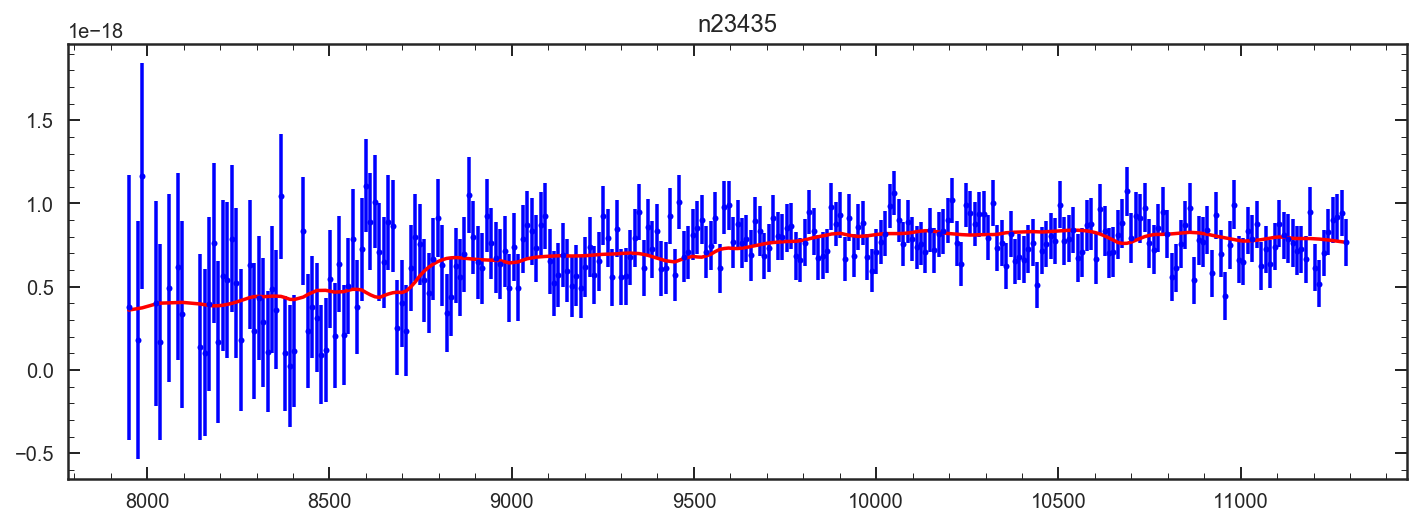

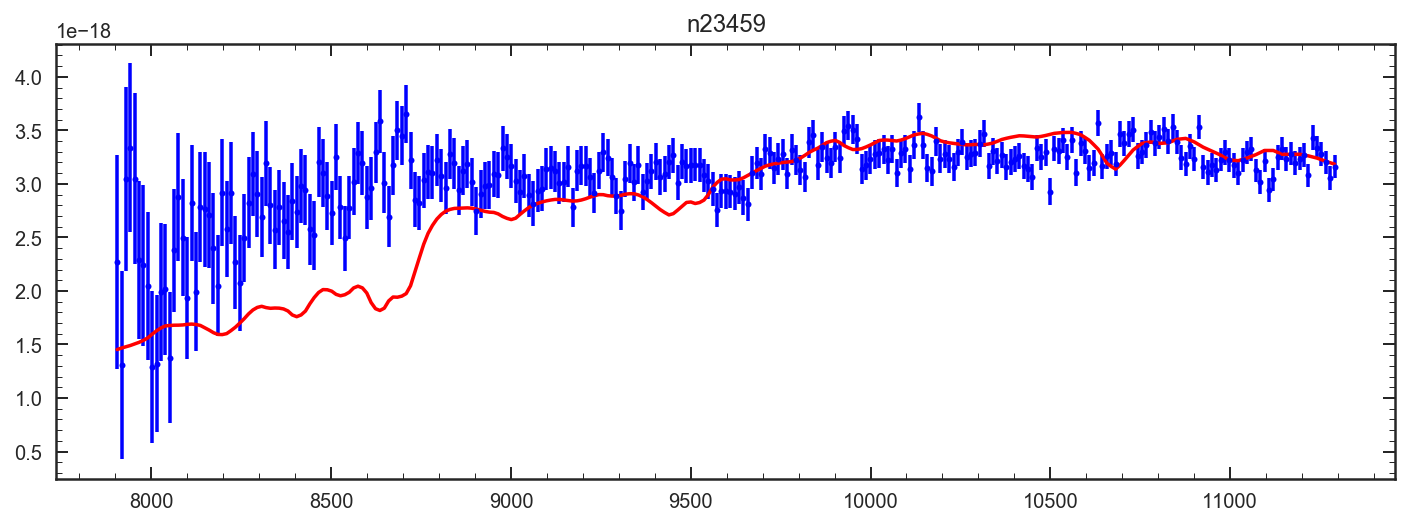

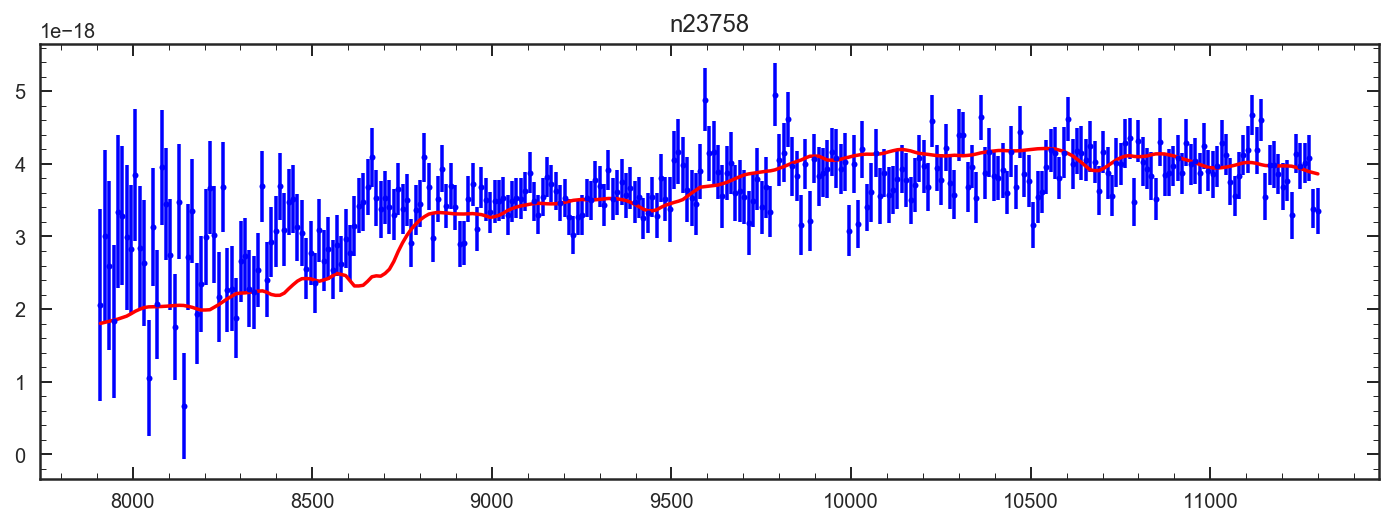

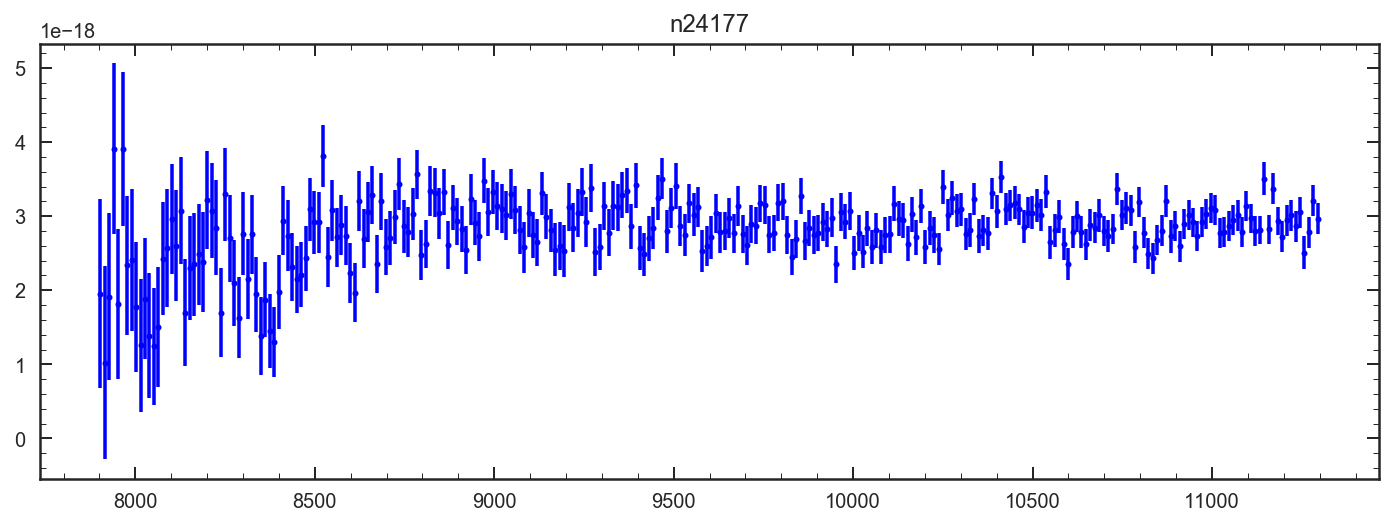

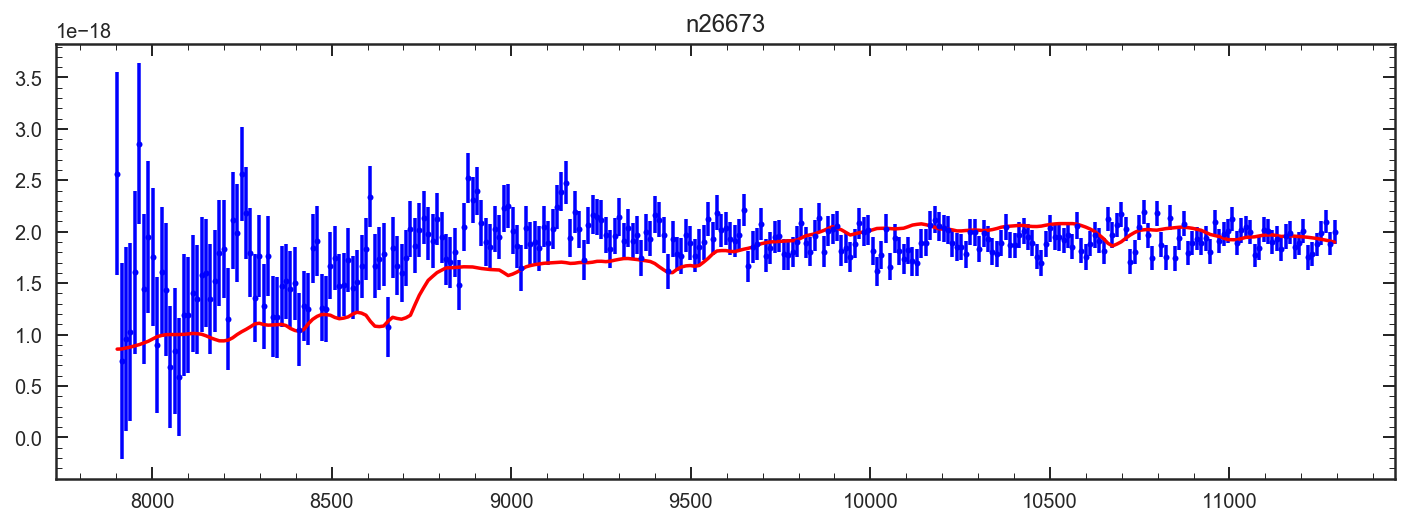

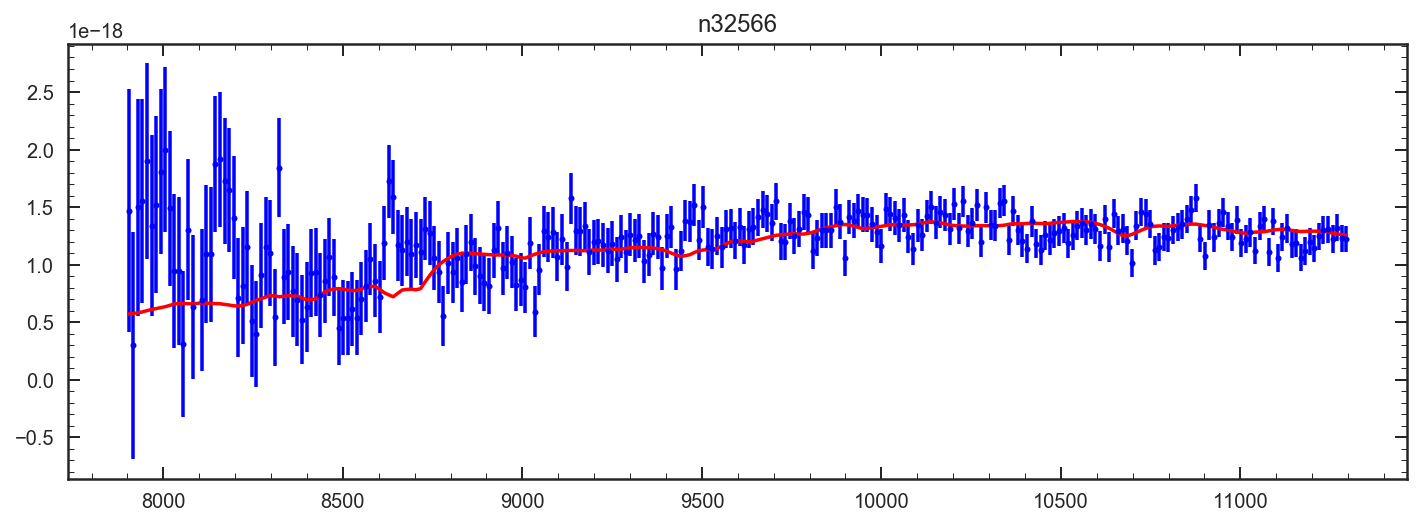

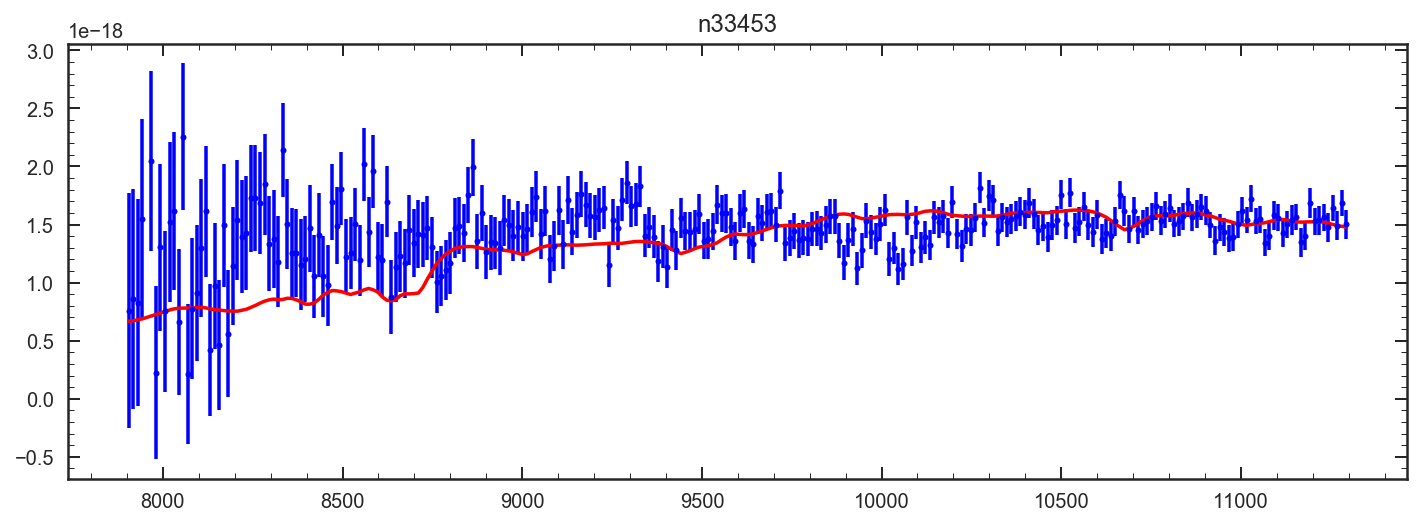

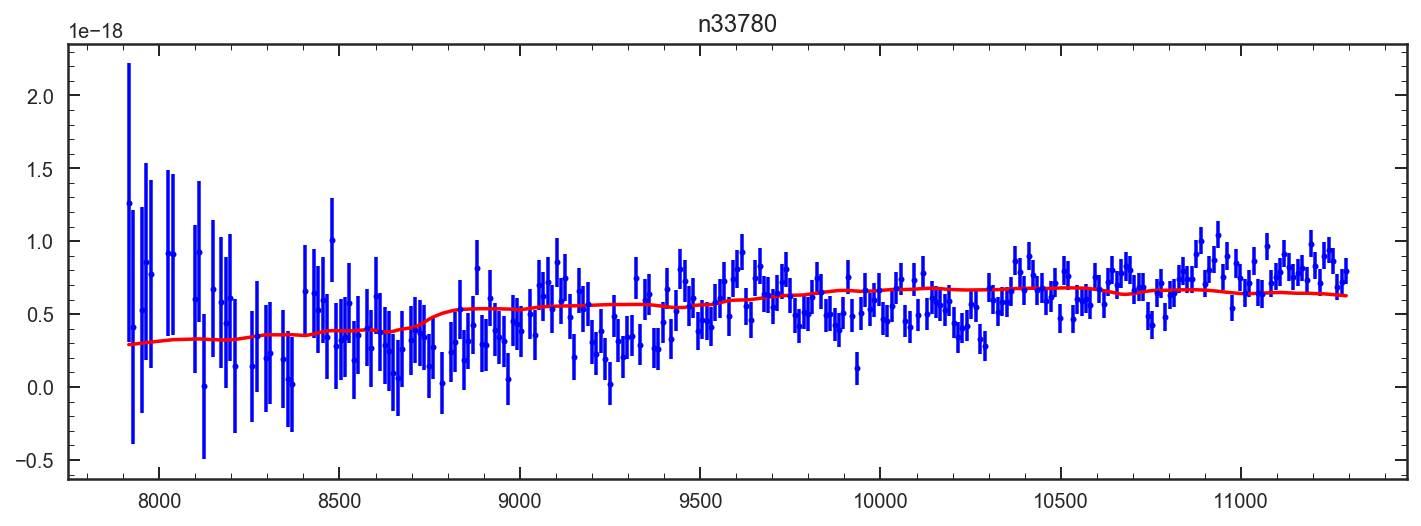

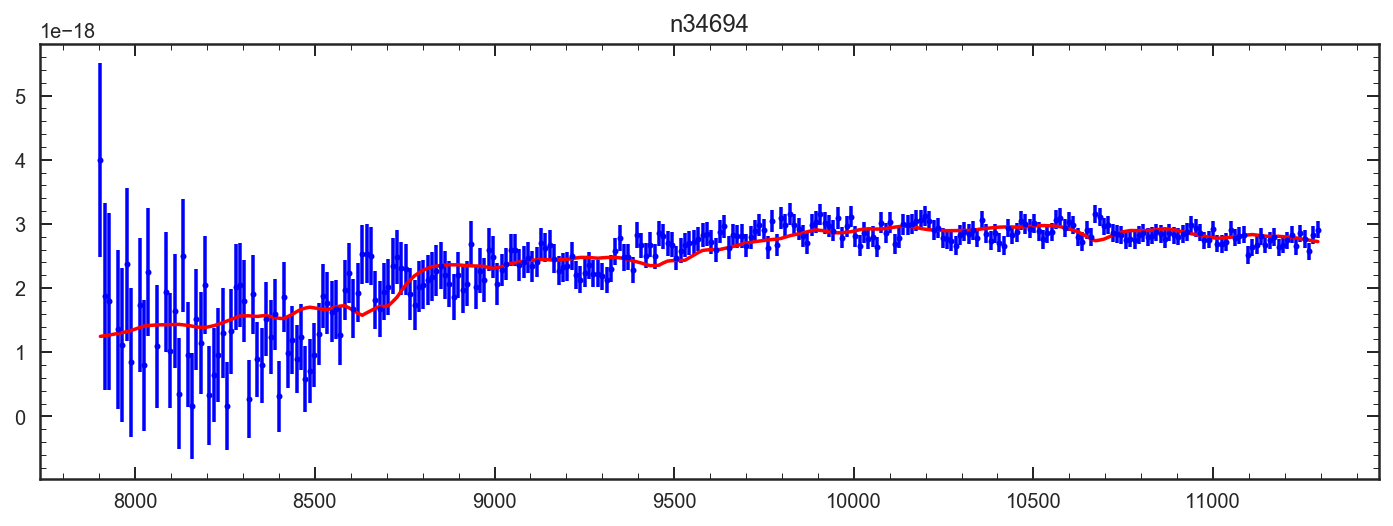

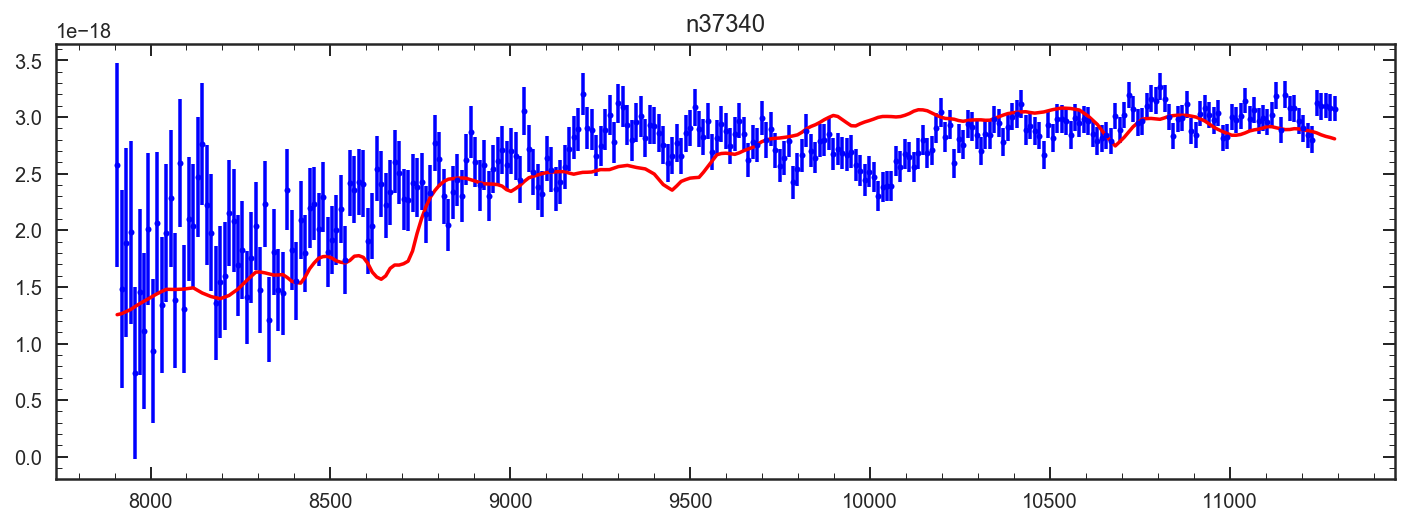

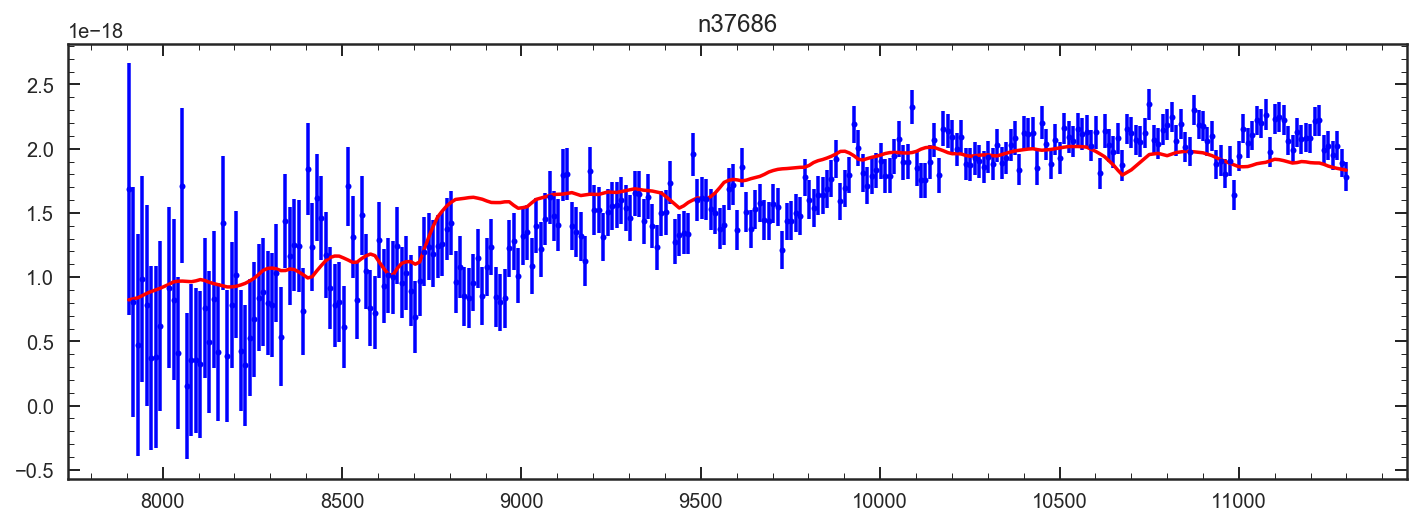

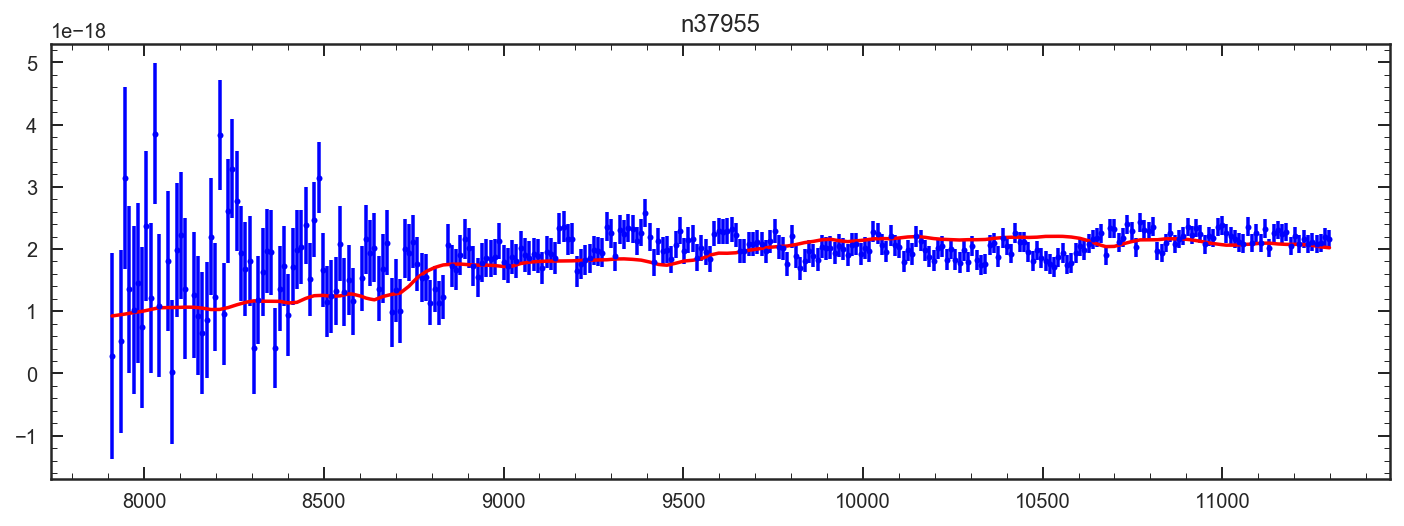

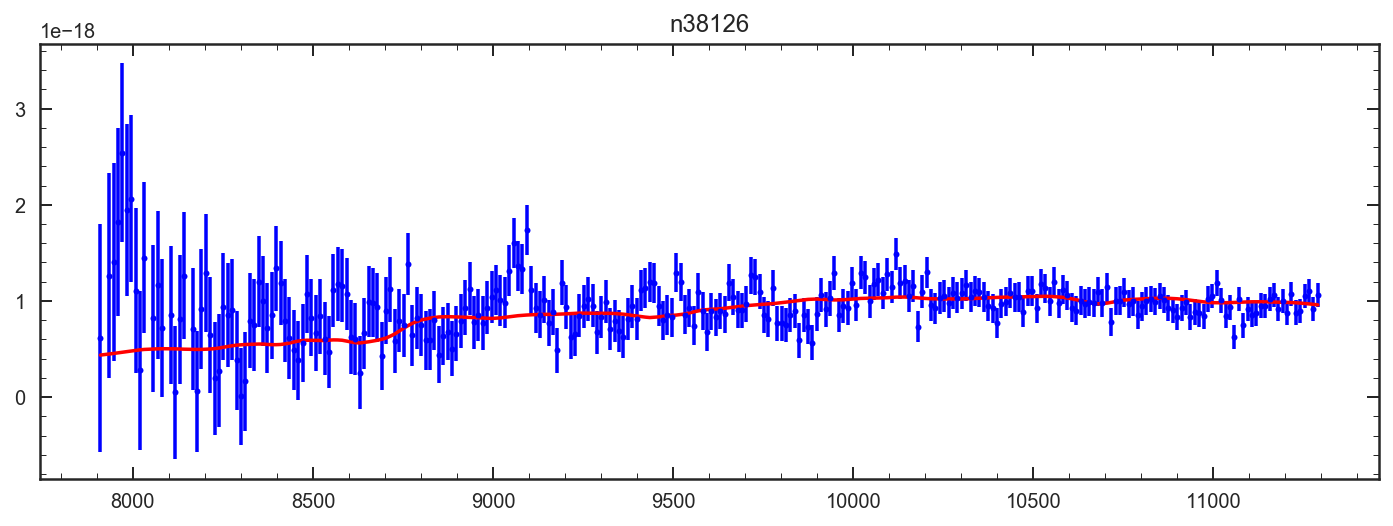

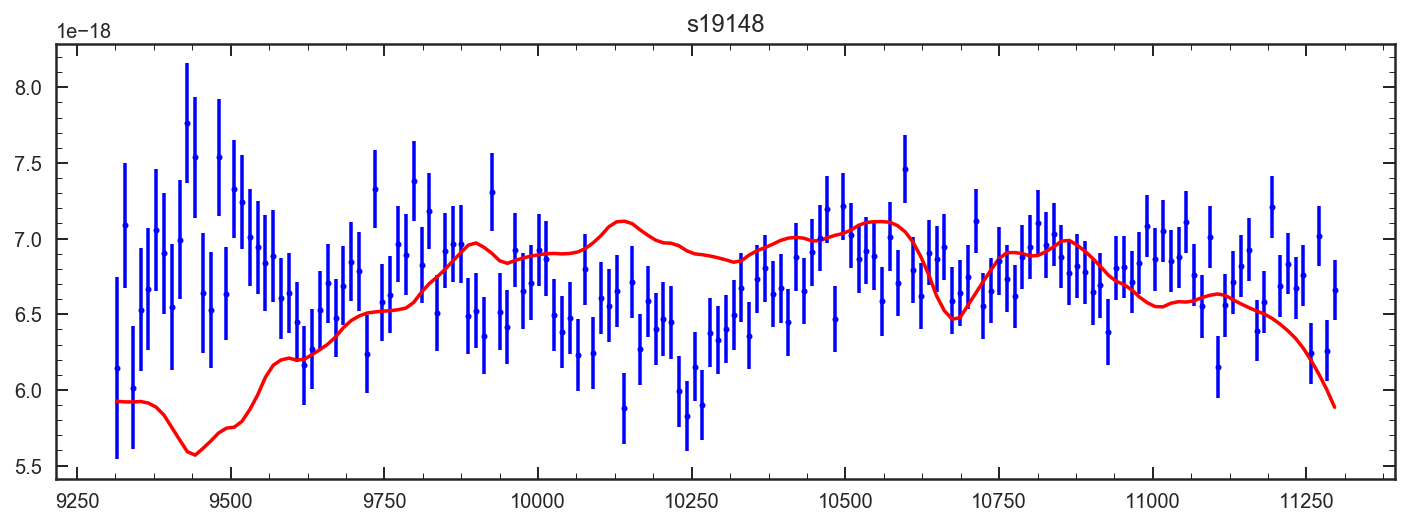

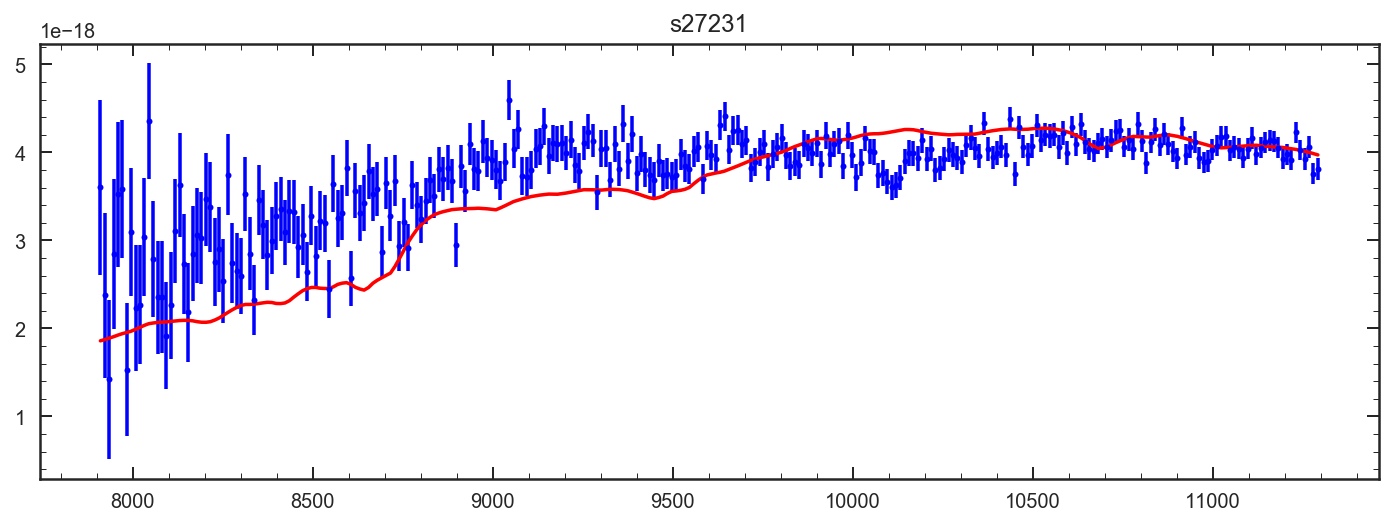

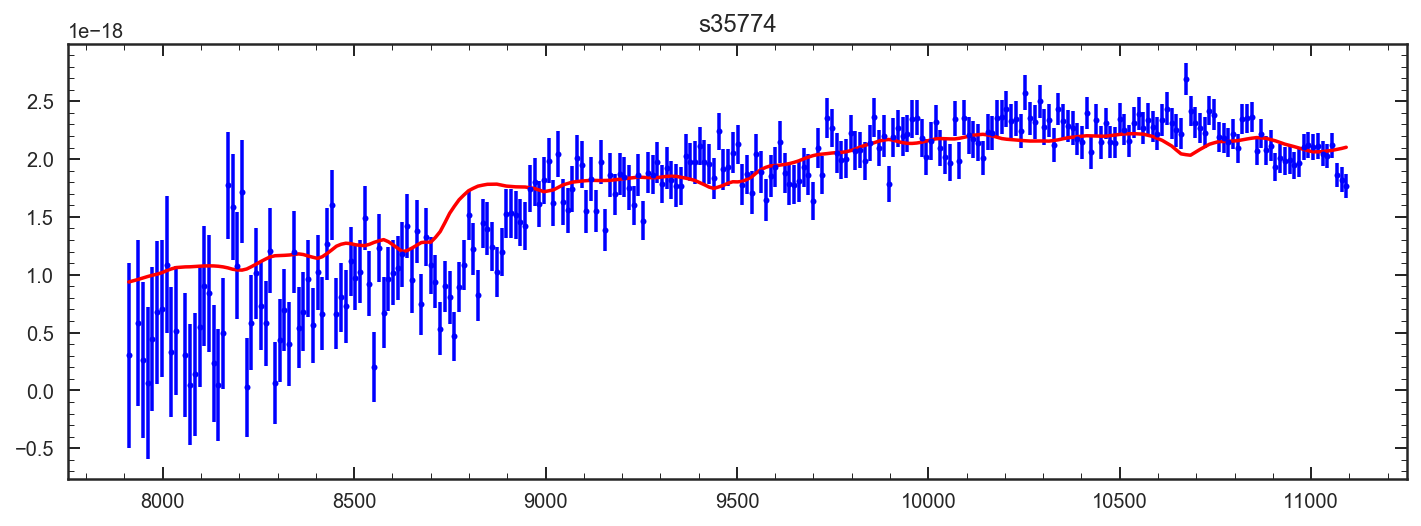

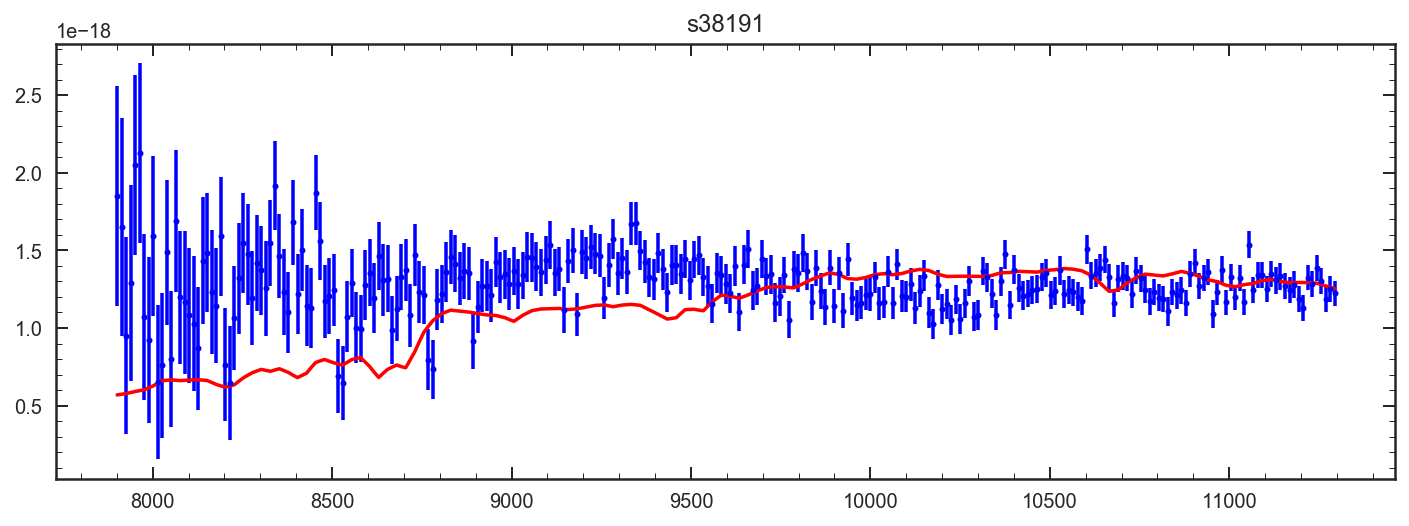

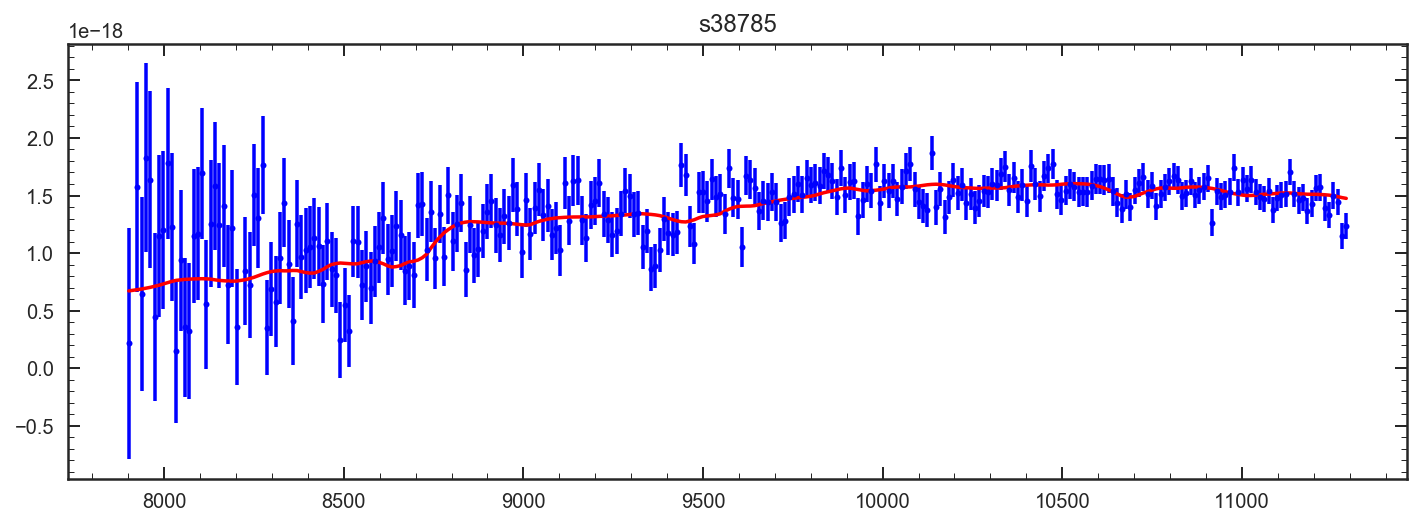

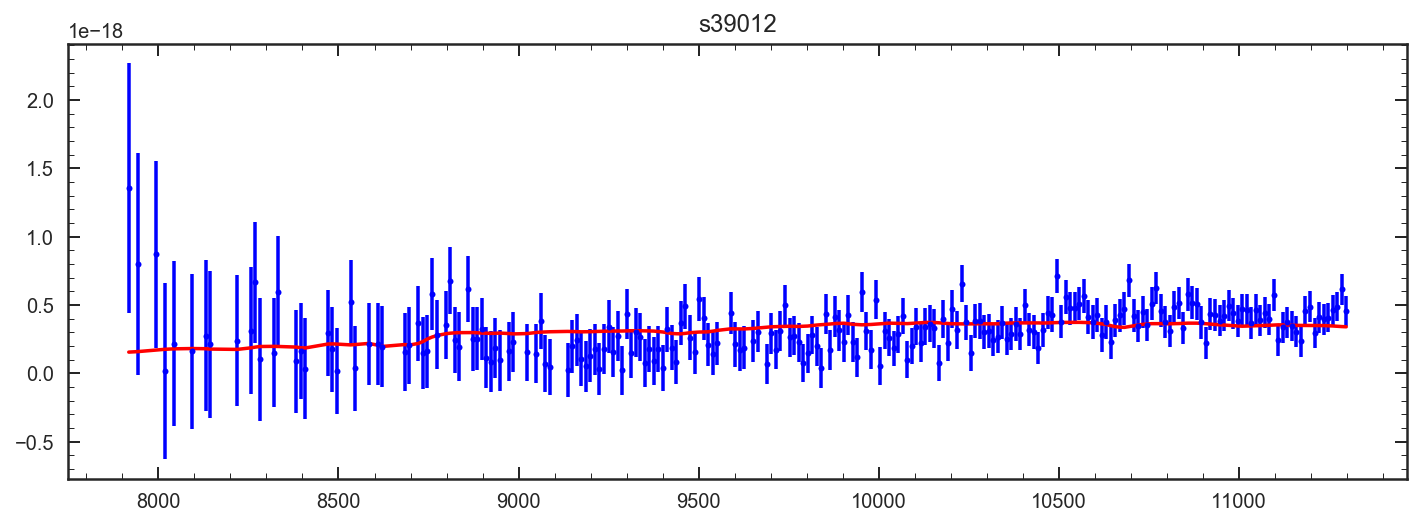

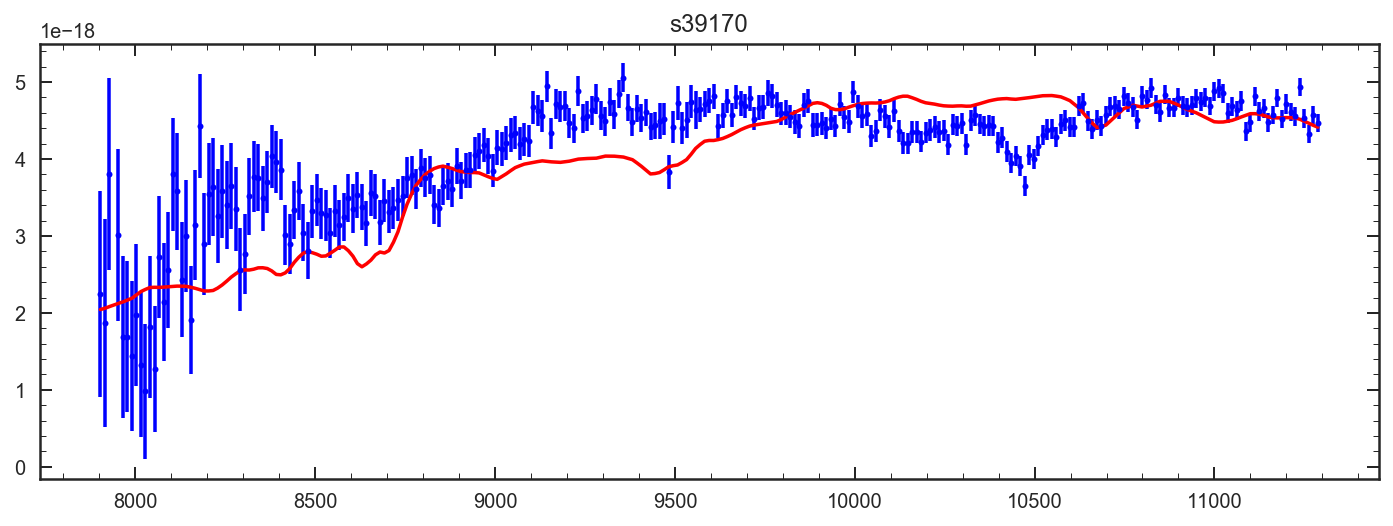

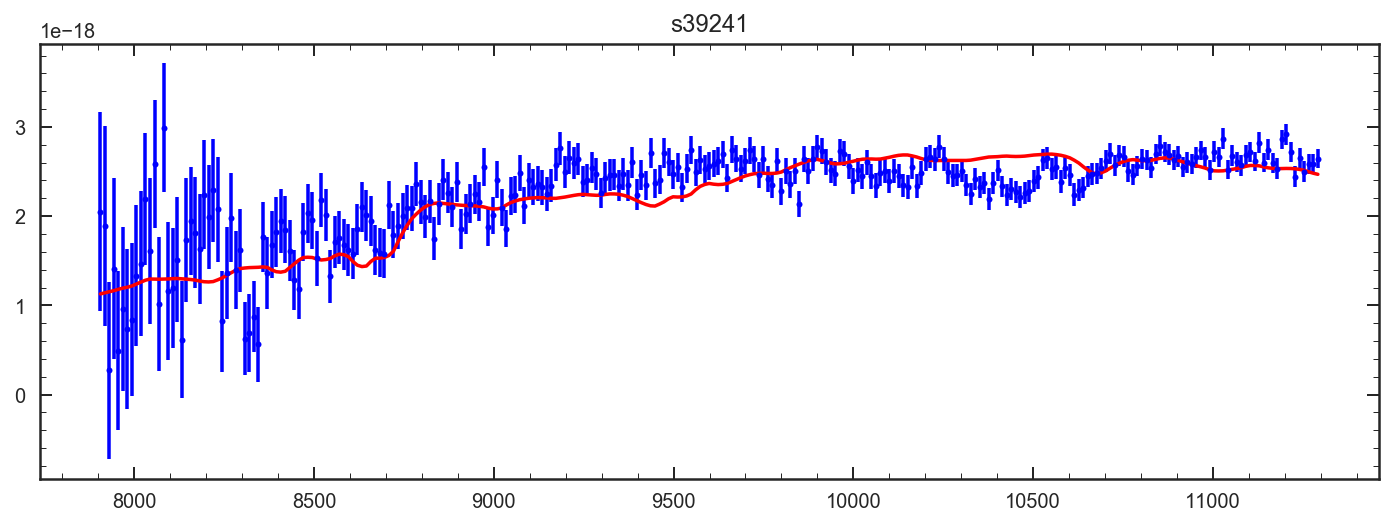

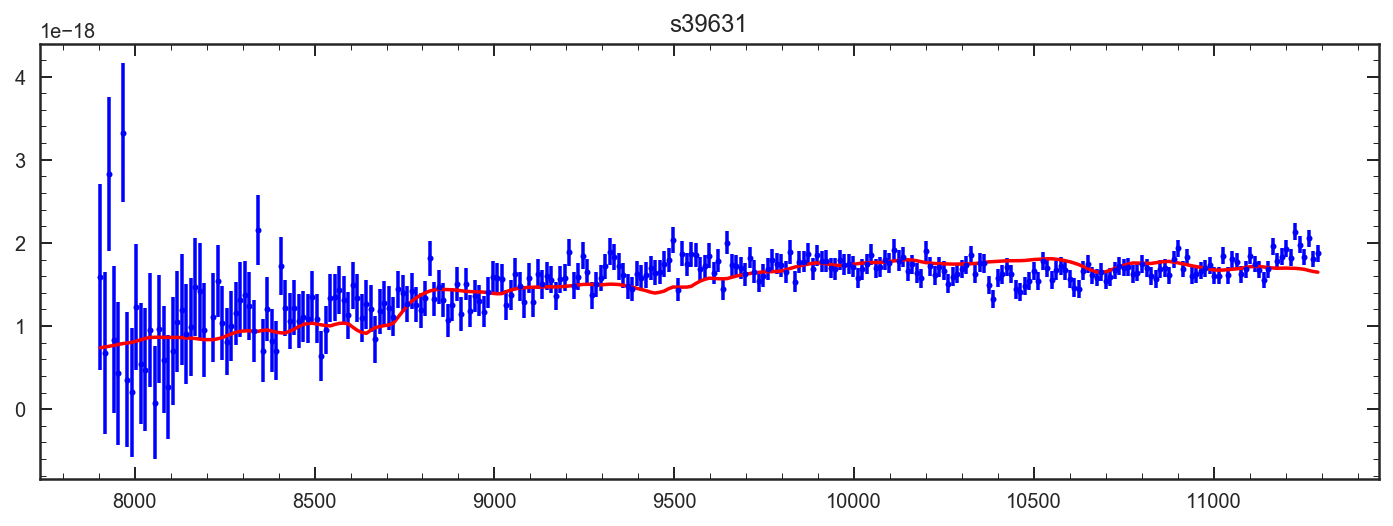

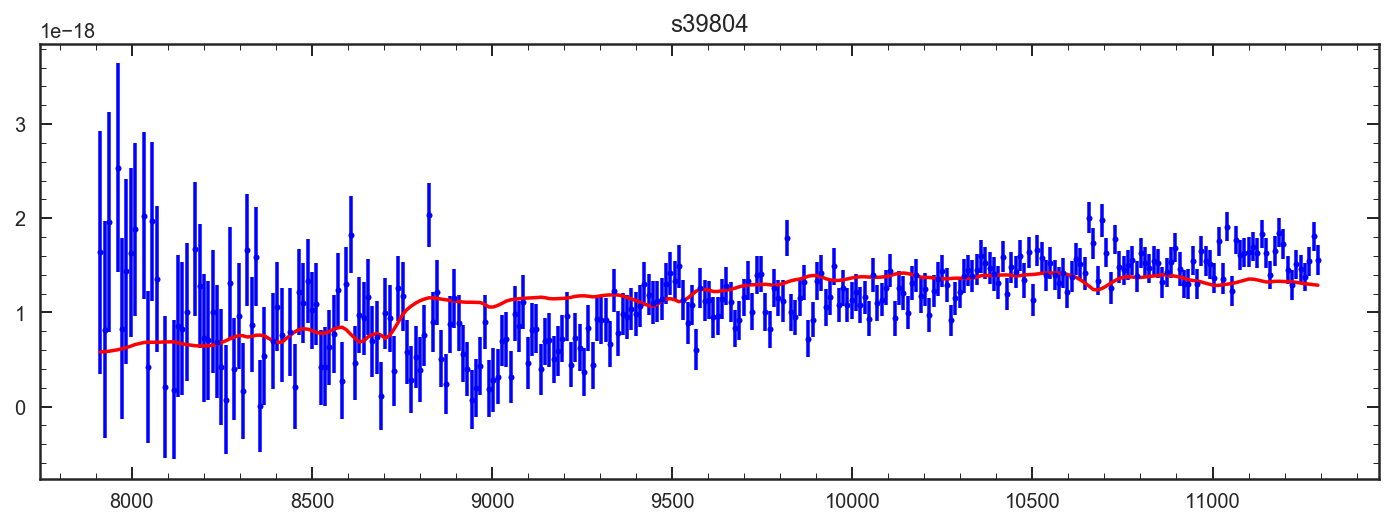

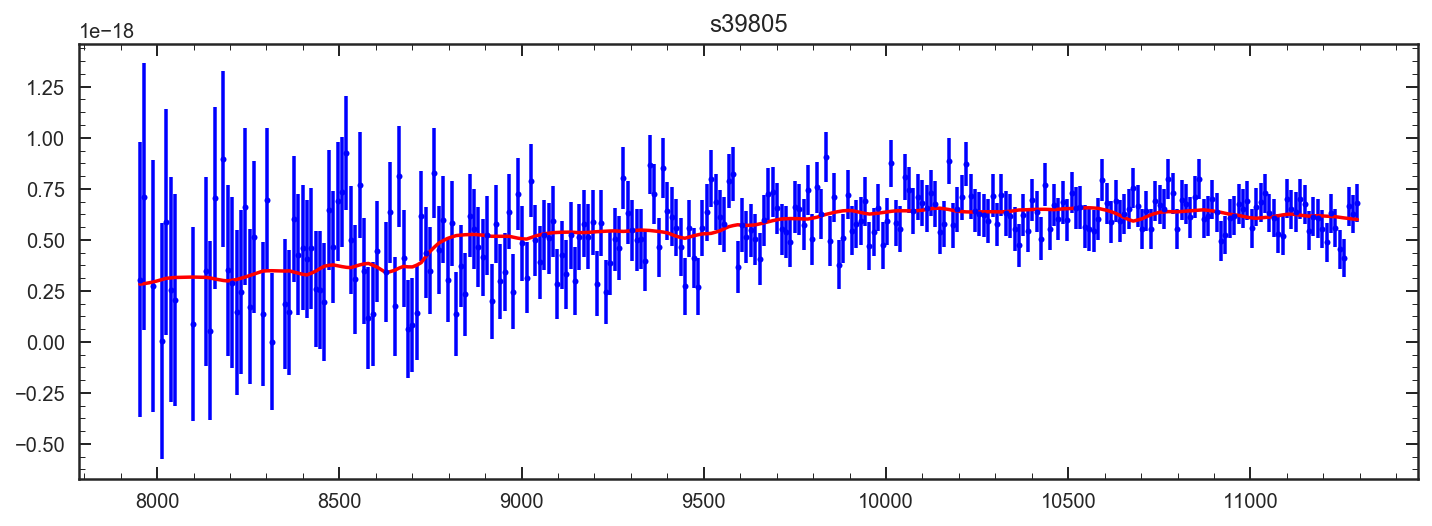

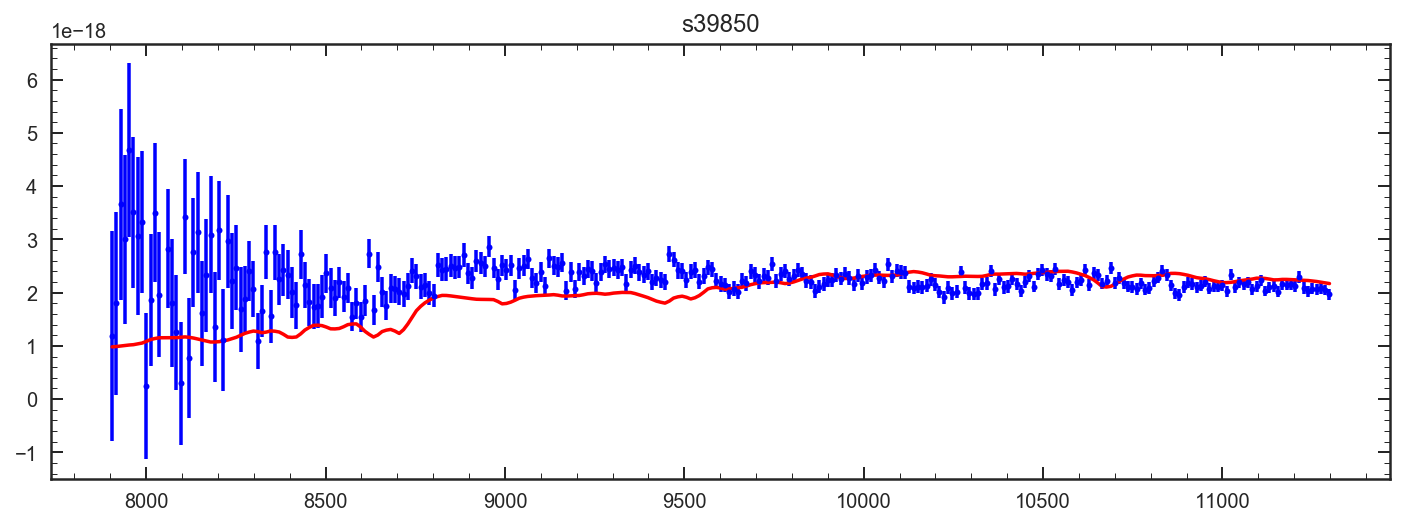

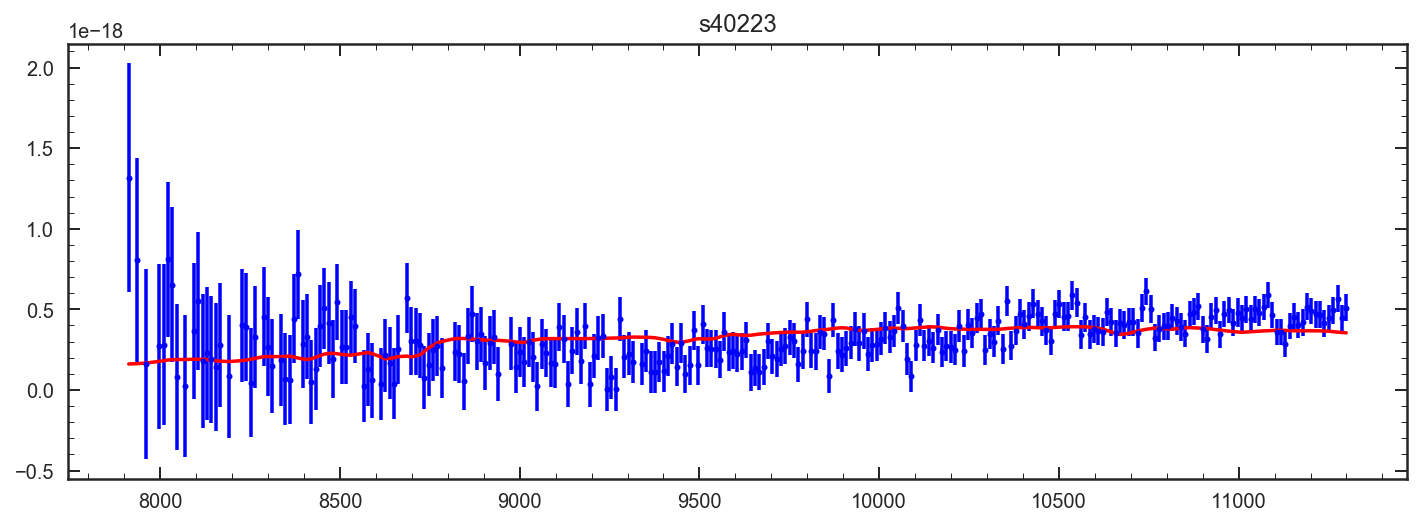

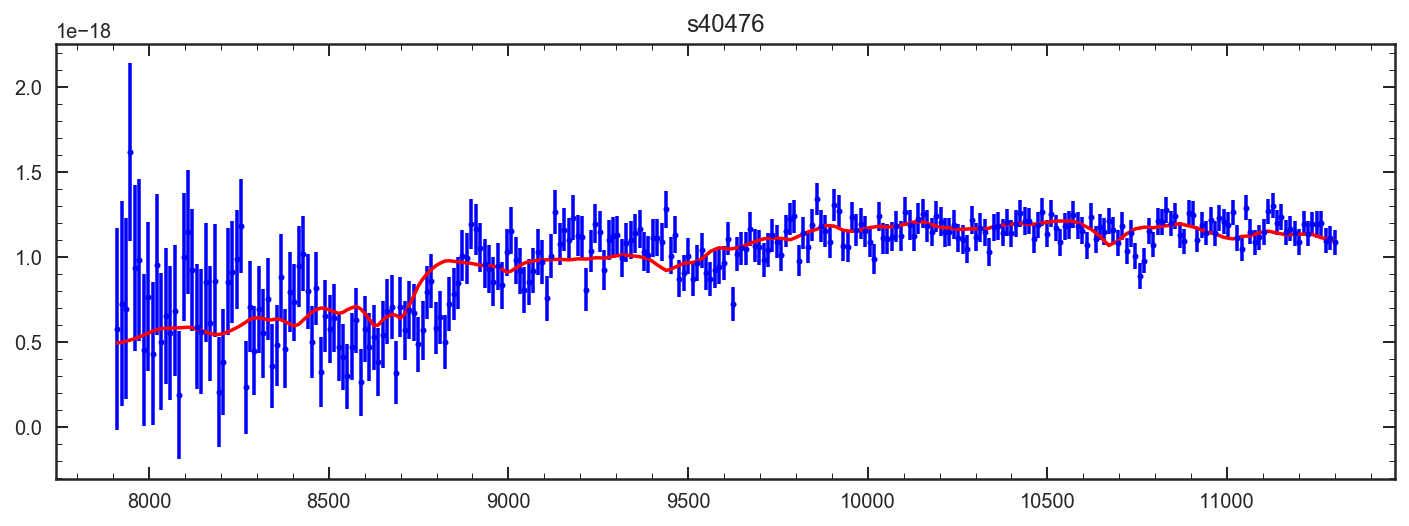

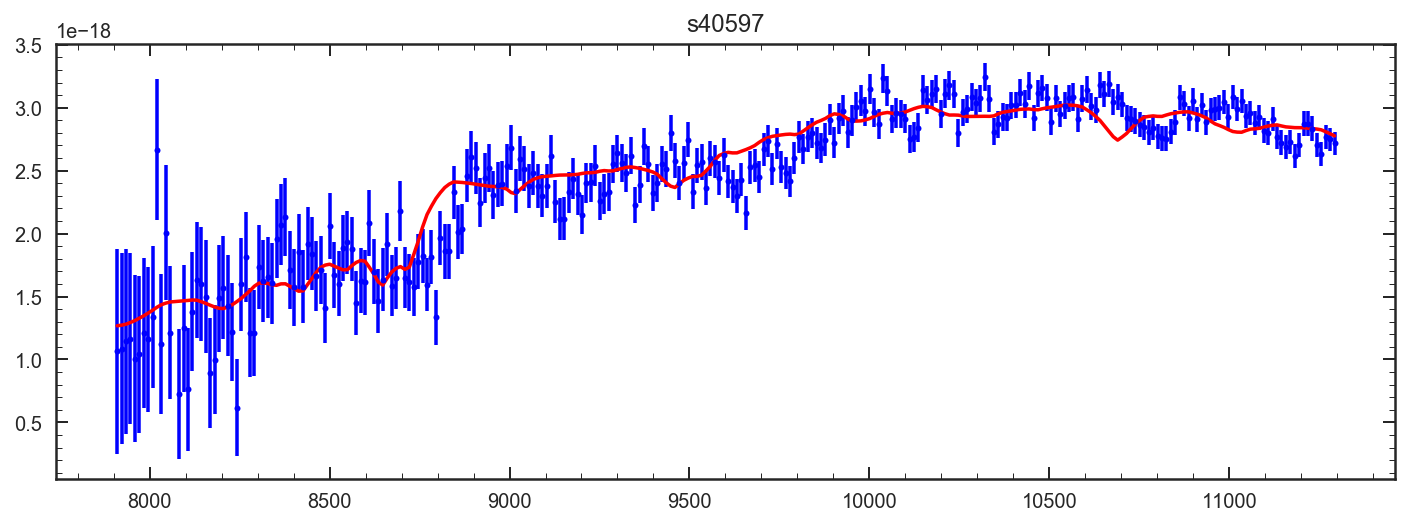

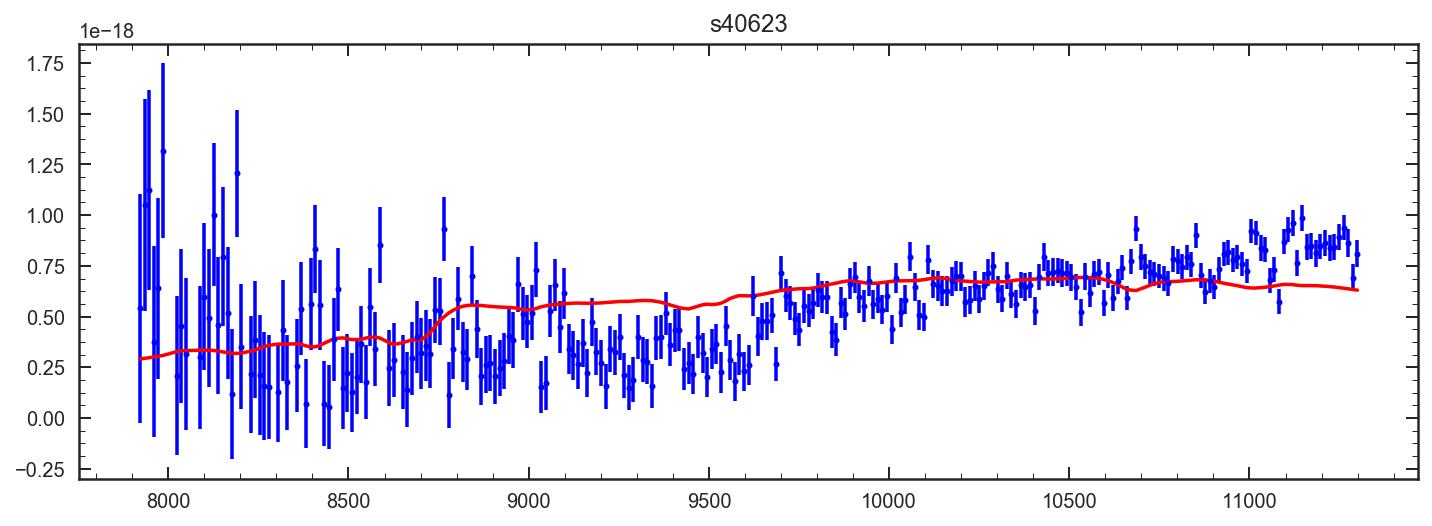

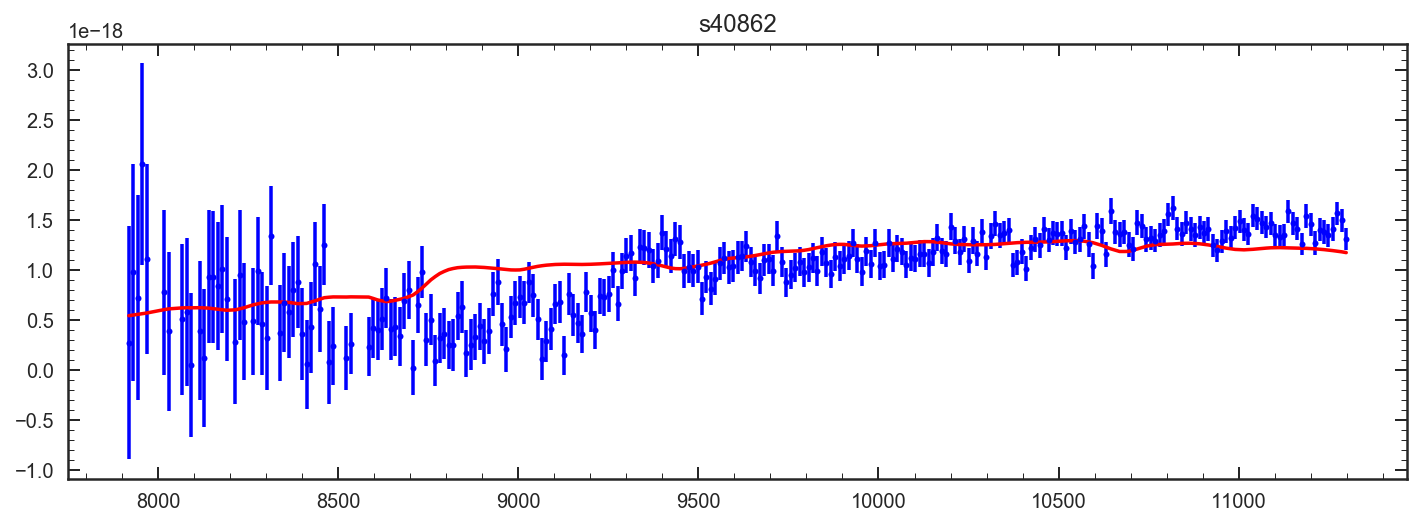

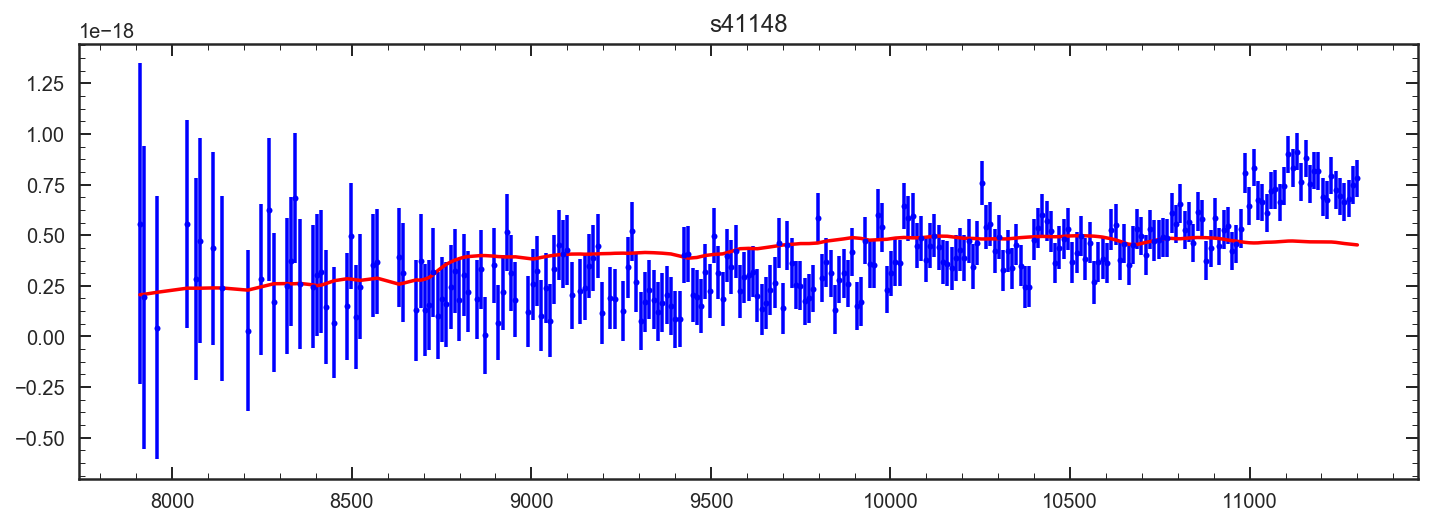

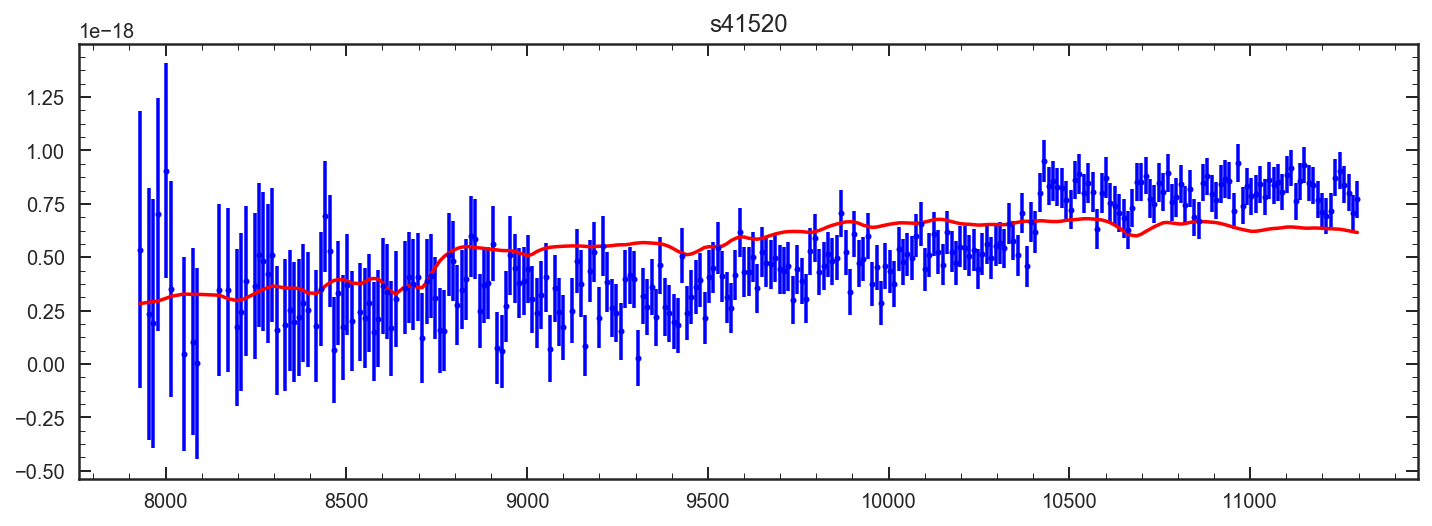

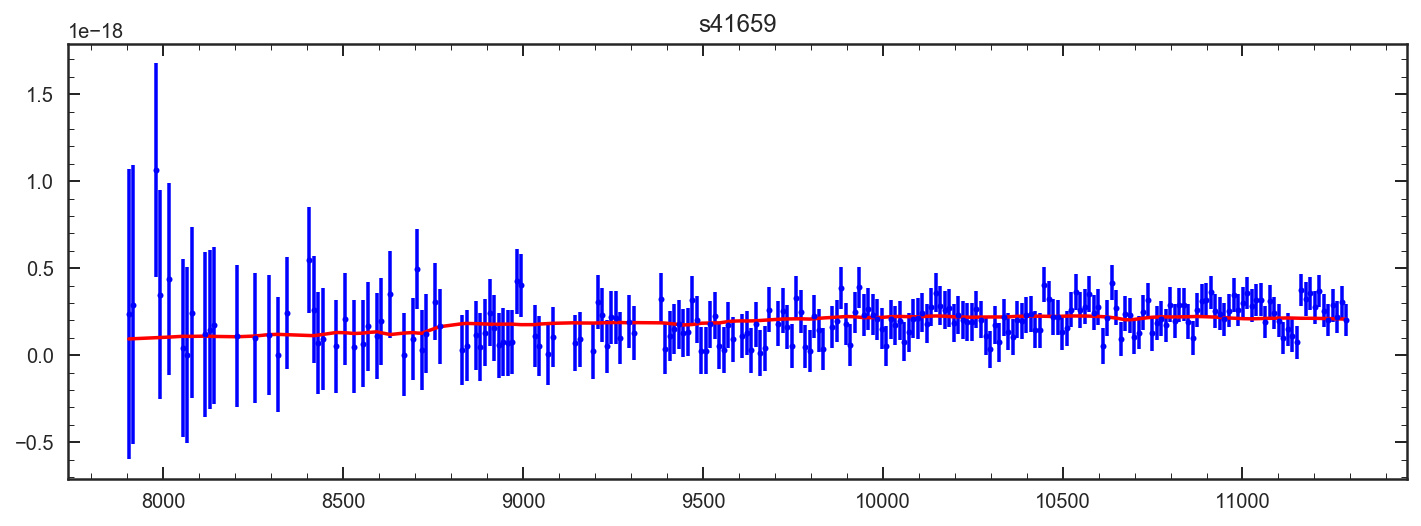

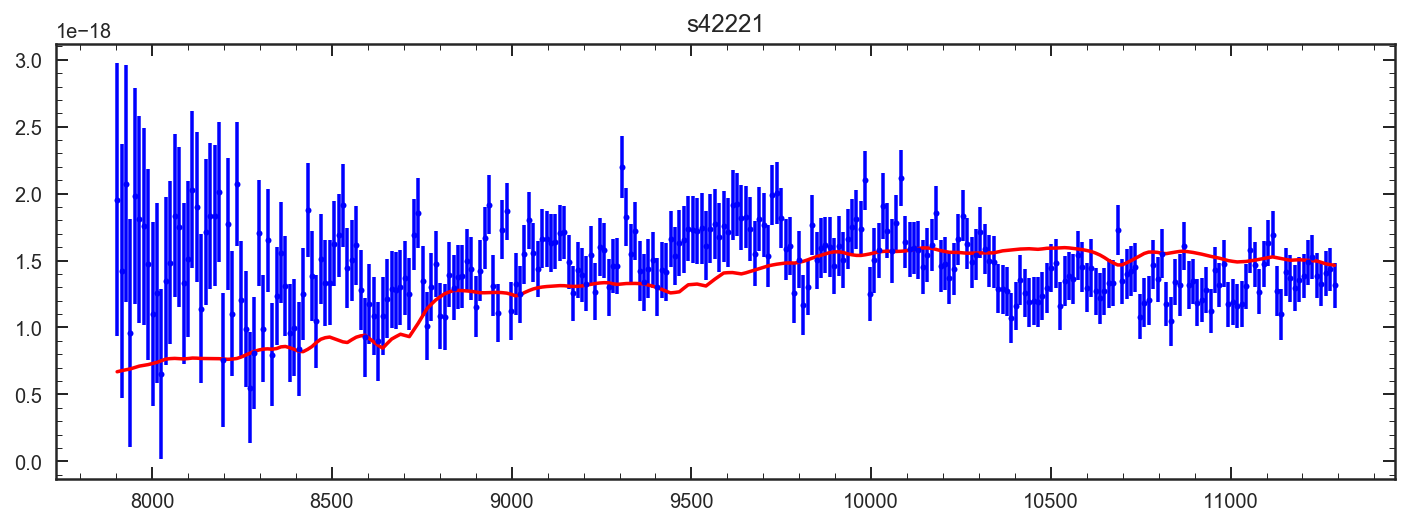

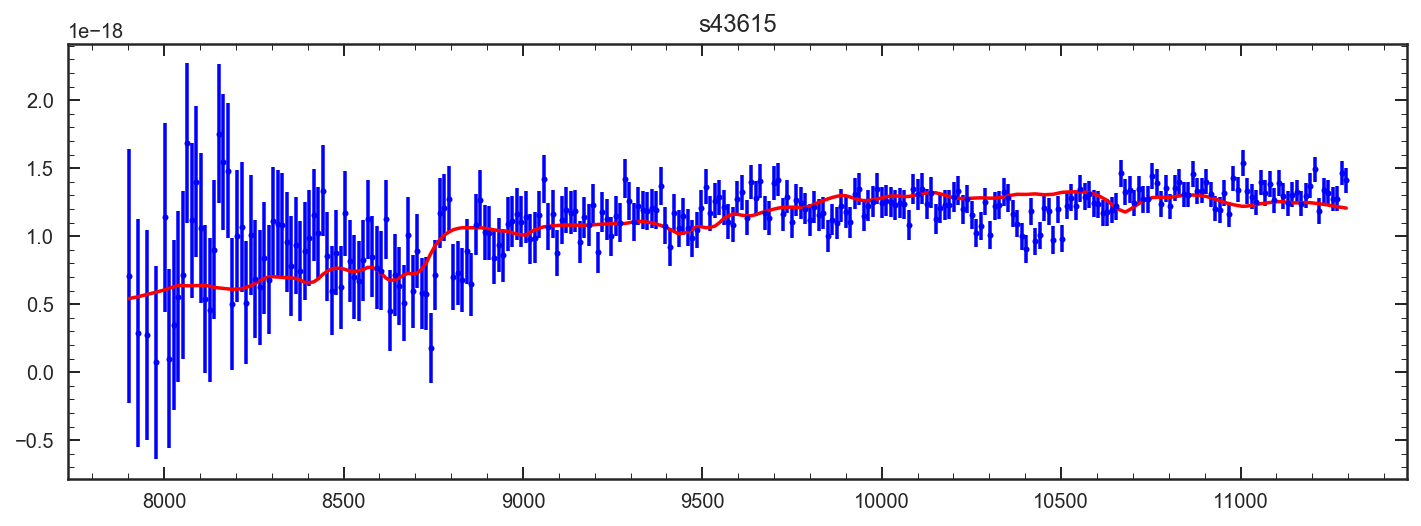

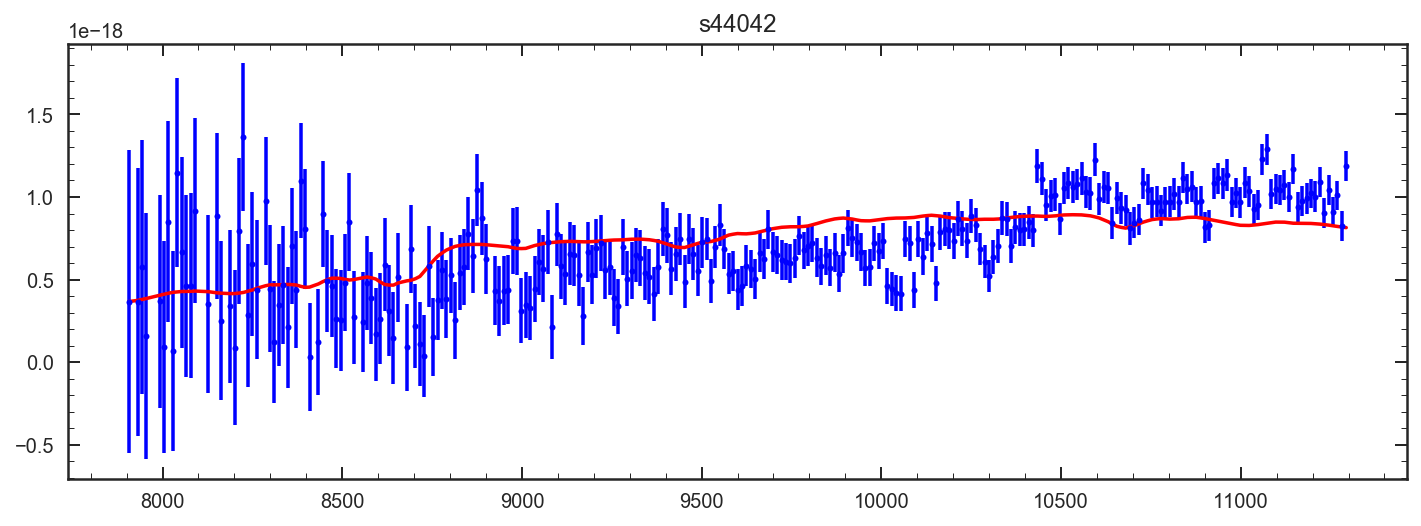

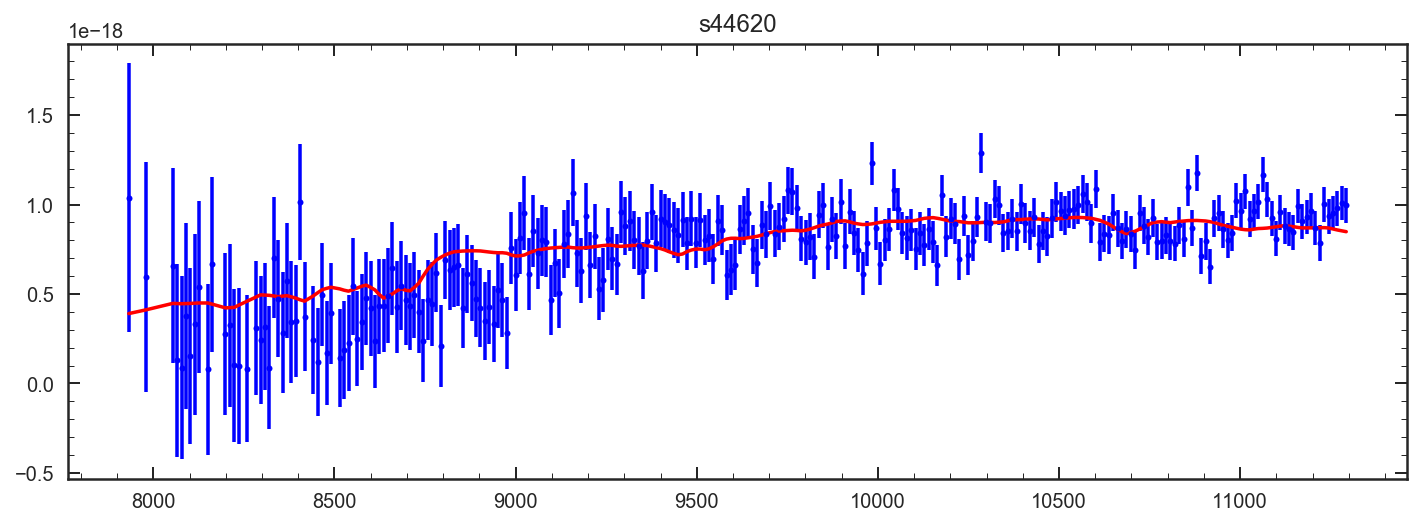

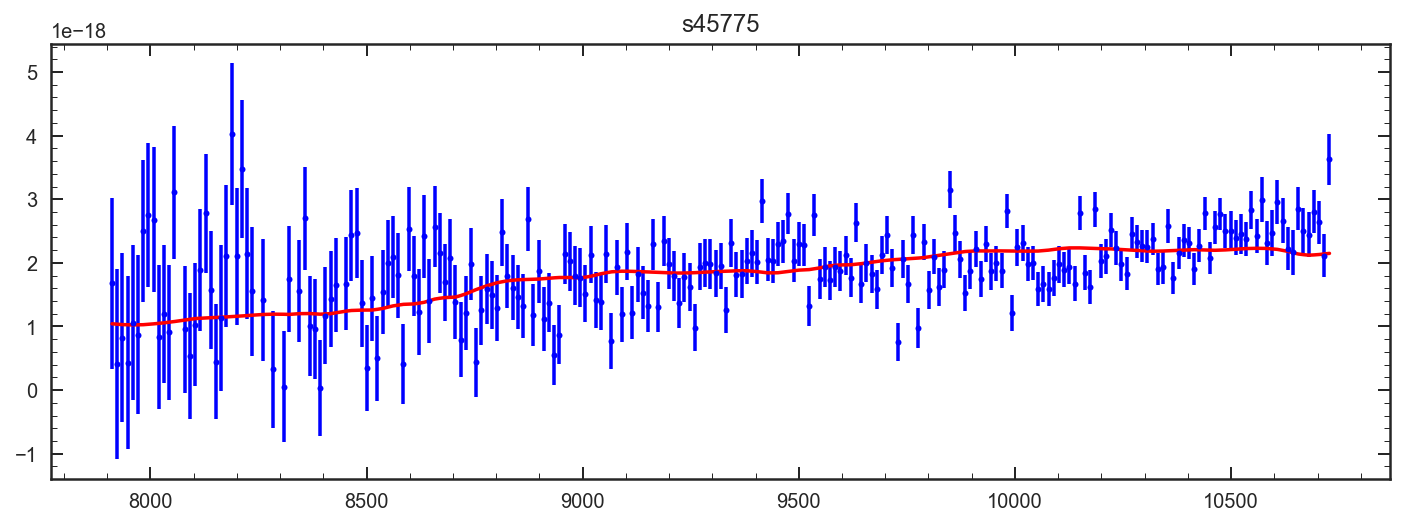

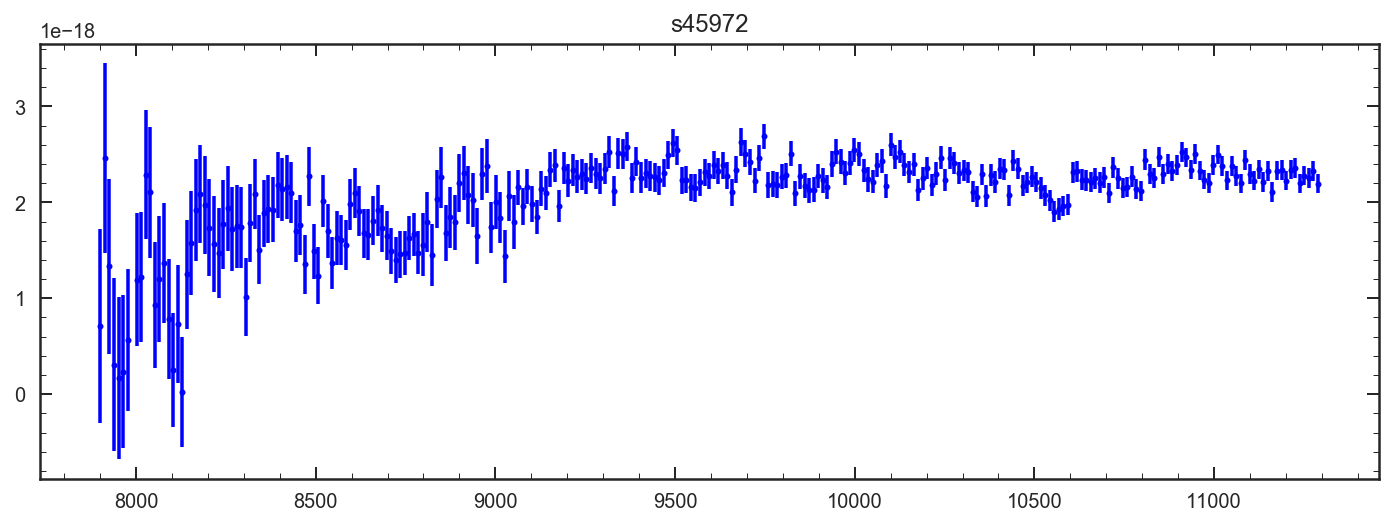

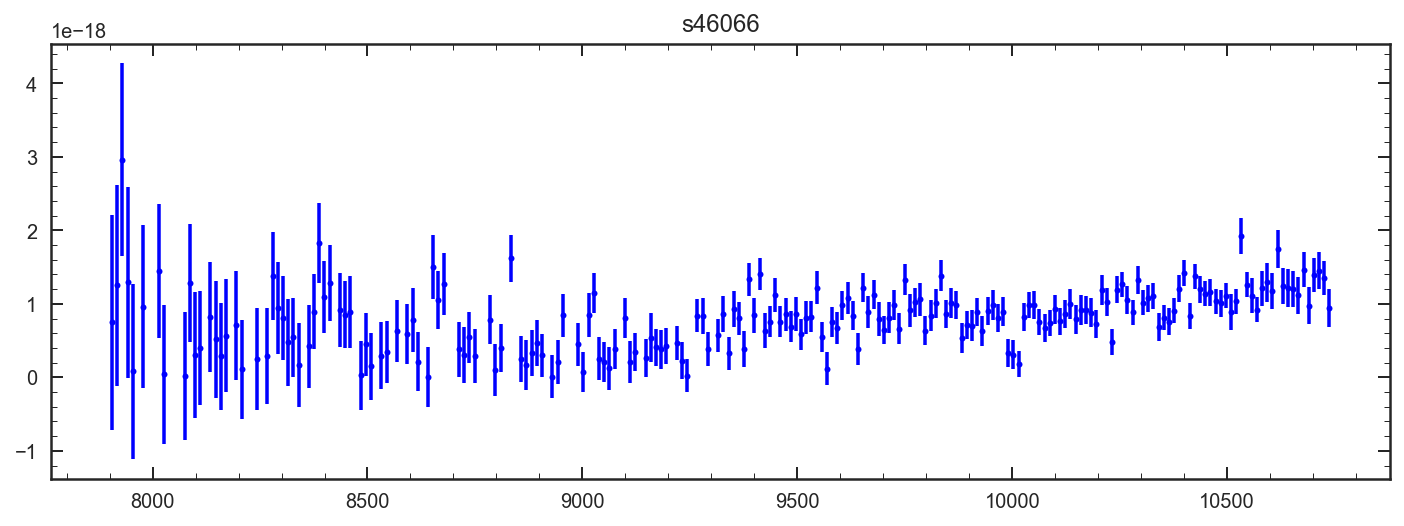

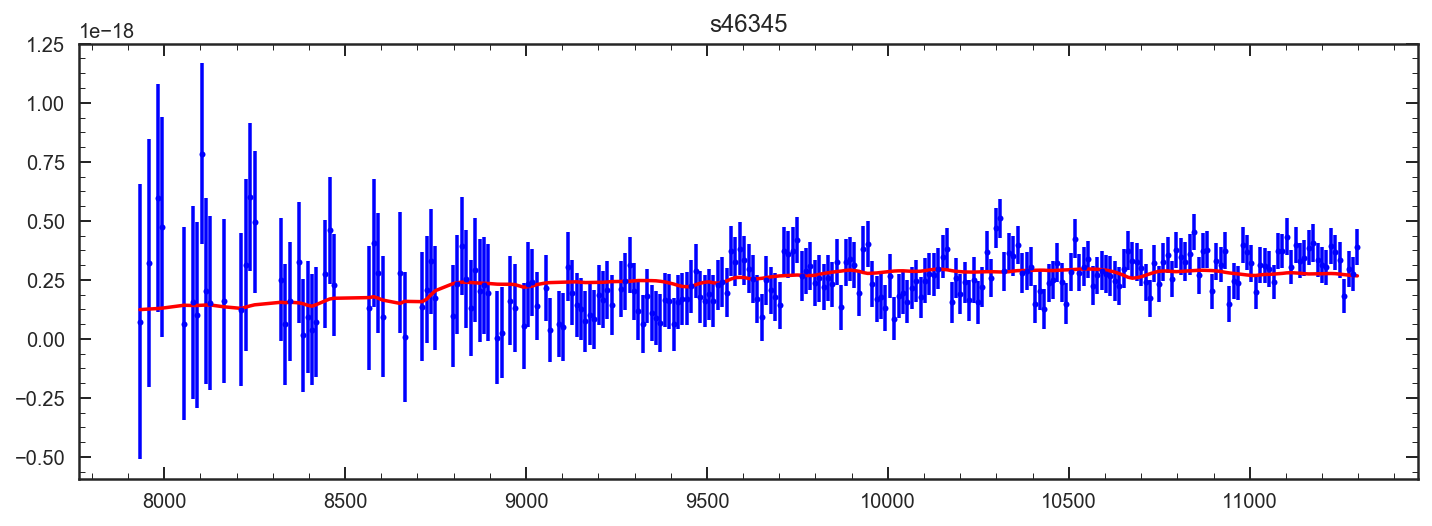

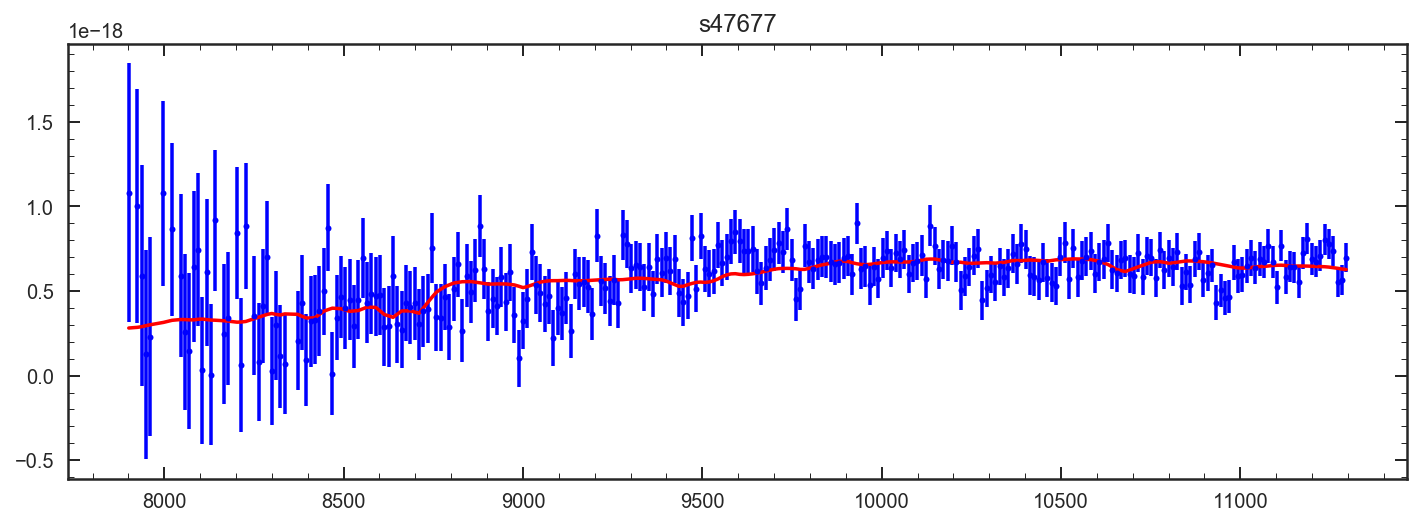

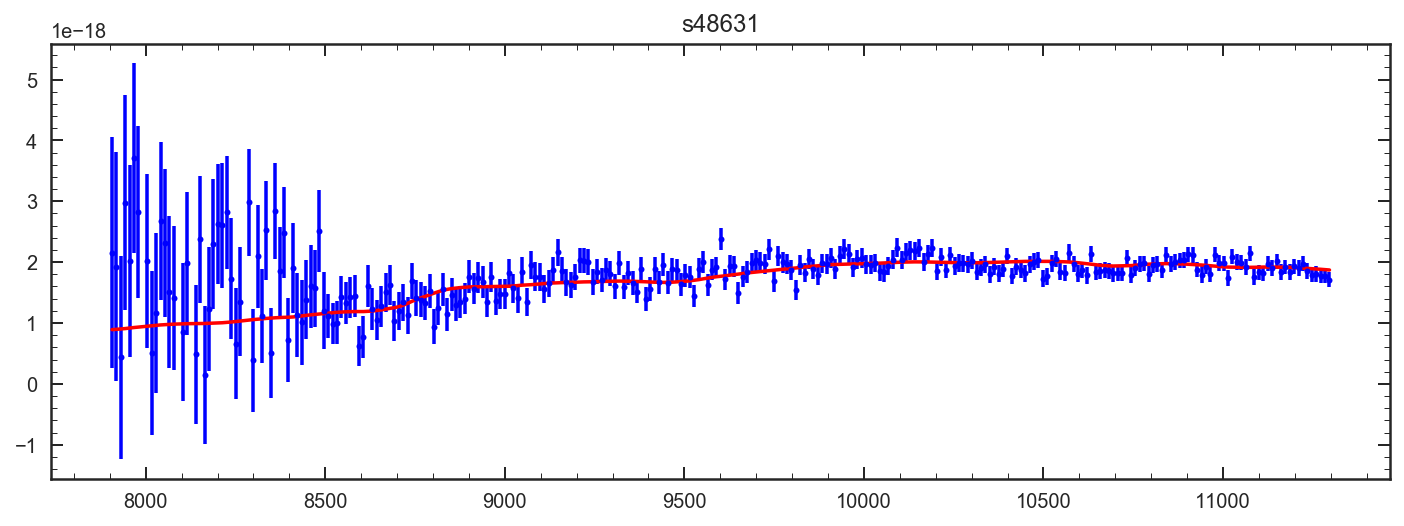

In [11]:
for i in range(len(slist)):
    sp2 = Gen_spec2(os.path.basename(slist[i]).replace('.npy',''),1.2)
    sp2.Sim_spec(0.019,2.0,8.0)
    plt.figure(figsize=[12,4])
    plt.errorbar(sp2.gal_wv,sp2.gal_fl,sp2.gal_er,linestyle='None', marker='o', markersize=3, color='b')
    plt.plot(sp2.gal_wv,sp2.fl,'r')
    plt.title(os.path.basename(slist[i]).replace('.npy',''))

In [10]:
len(blist),len(nbeamid)

(73, 55)

In [279]:
glob('/Volumes/Vince_research/clear_q_beams/*{0}*'.format(10338))

[]

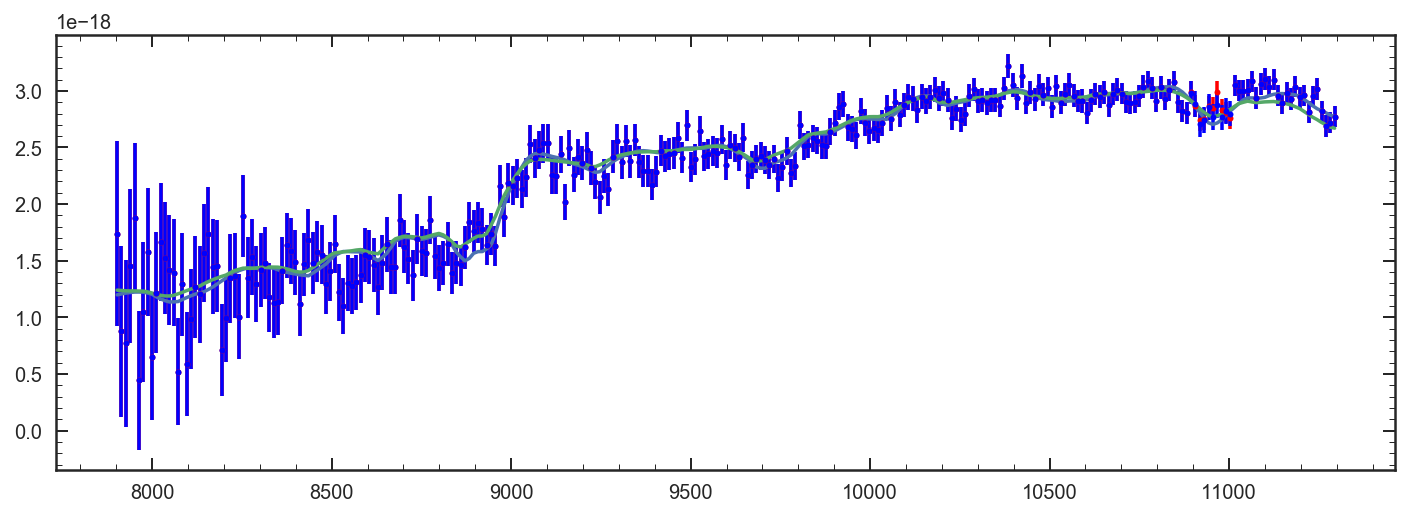

In [273]:
plt.figure(figsize=[12,4])
plt.errorbar(sp2.gal_wv,sp2.gal_fl,sp2.gal_er,linestyle='None', marker='o', markersize=3, color='b')
plt.plot(sp2.gal_wv,sp2.fl)

In [251]:
glob('/Volumes/Vince_research/clear_q_beams/*{0}*'.format(21156))[0]

'/Volumes/Vince_research/clear_q_beams/icxta4mjq_flt_21156.g102.A.fits'

In [8]:
slist = []
for i in blist:
    if int(os.path.basename(i).replace('.npy','')[1:]) in nbeamid:
        slist.append(os.path.basename(i).replace('.npy',''))
#     print(int(os.path.basename(i).replace('.npy','')[1:]))

In [298]:
27231 in nbeamid

True

In [290]:
np.sort(nbeamid)

array([13182, 13774, 16758, 17070, 17436, 19148, 19442, 21156, 21427,
       22210, 22213, 22246, 23081, 23435, 23459, 23758, 24177, 26673,
       27231, 32566, 33453, 33780, 34694, 35774, 37340, 37686, 37955,
       38126, 38191, 38785, 39012, 39170, 39241, 39631, 39804, 39805,
       39850, 40223, 40476, 40597, 40623, 40862, 41148, 41520, 41659,
       42221, 43615, 44042, 44620, 45775, 45972, 46066, 46345, 47677,
       48631])

In [301]:
len(slist)

55